In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

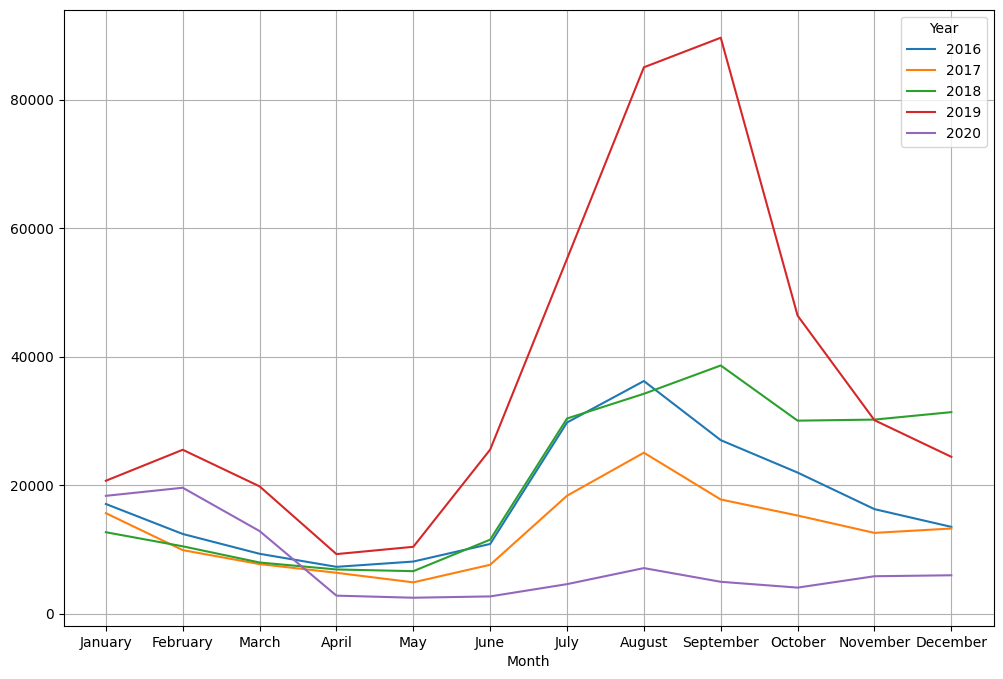

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h1> LINE PLOT WITH SEABORN </h1>

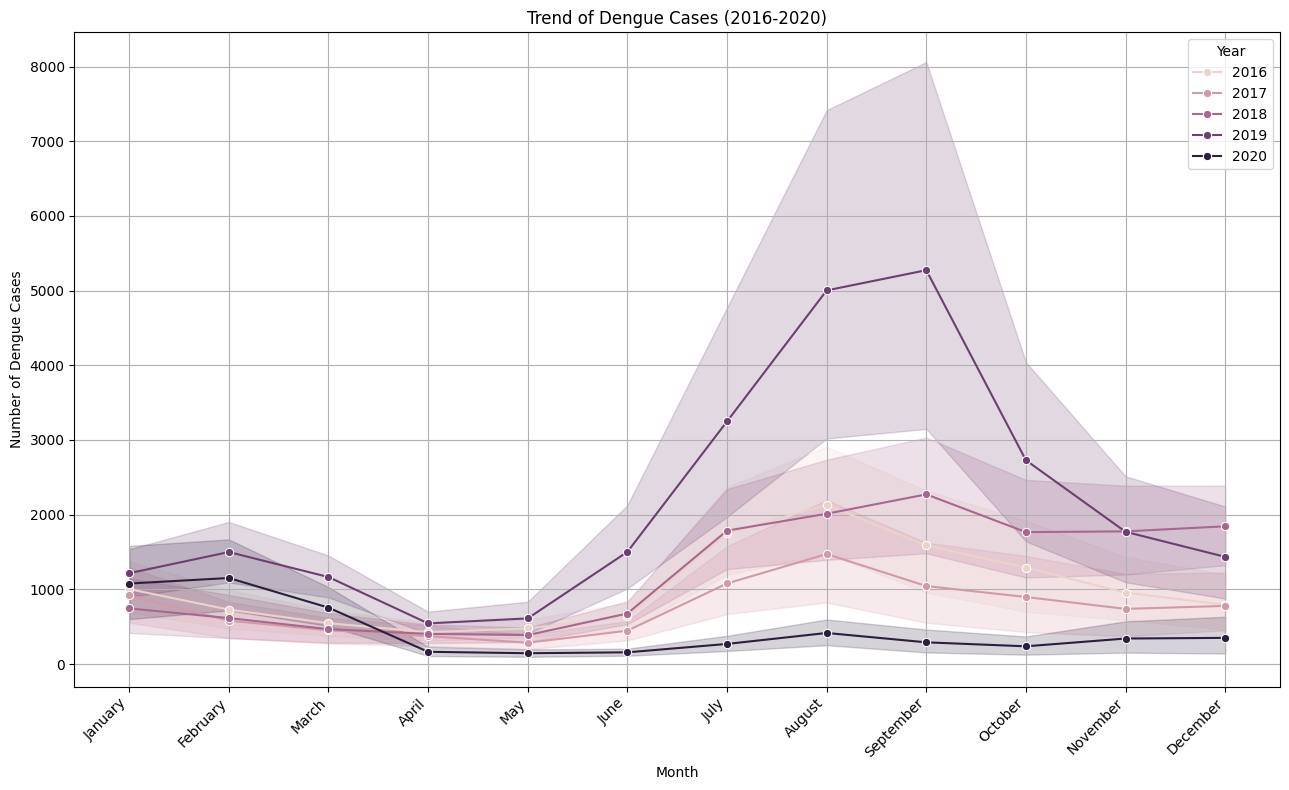

In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot( data=dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13, 8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1> Insight No. 1 </h1>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

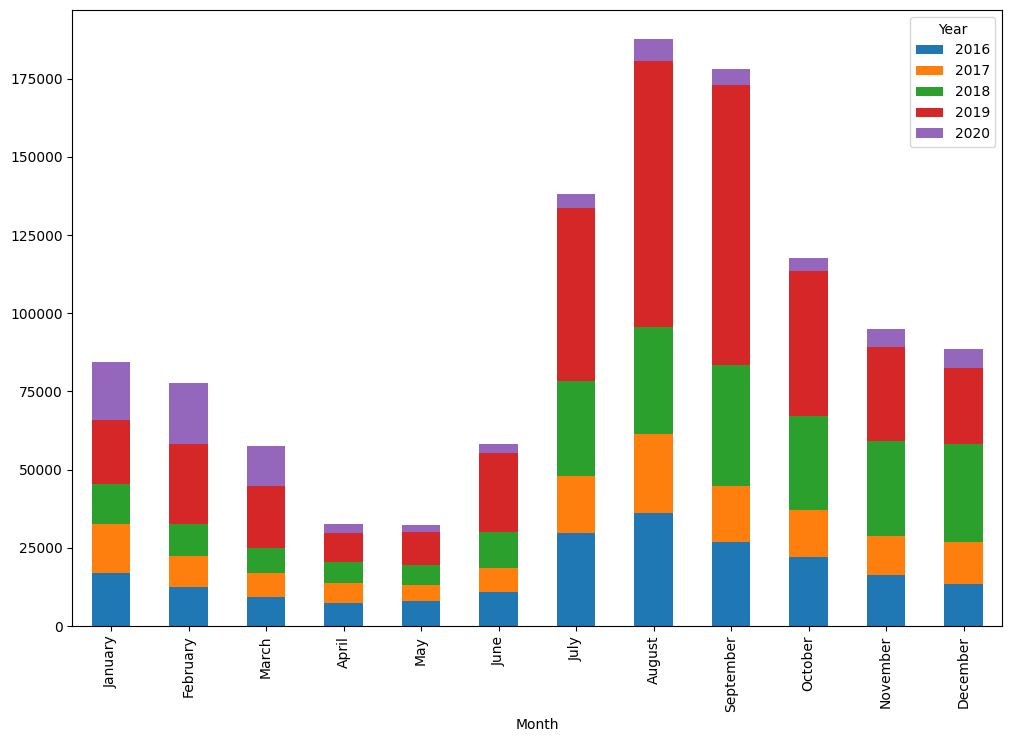

In [10]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1>Insight No. 2</h1>
<p>August consistently shows the highest number of dengue cases, likely due to the peak of the rainy season in the Philippines. Increased rainfall during this time creates more stagnant water, which serves as breeding grounds for mosquitoes, leading to a surge in dengue transmission.

<h1>Insight No. 3</h1>
<p>The stacked bar chart shows that dengue cases are generally lower during the summer months (March to May). This decline is likely due to hotter and drier conditions, which reduce standing water where mosquitoes breed. The heat may also shorten the mosquito lifespan and reduce virus transmission, leading to fewer cases during this period across regions.

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

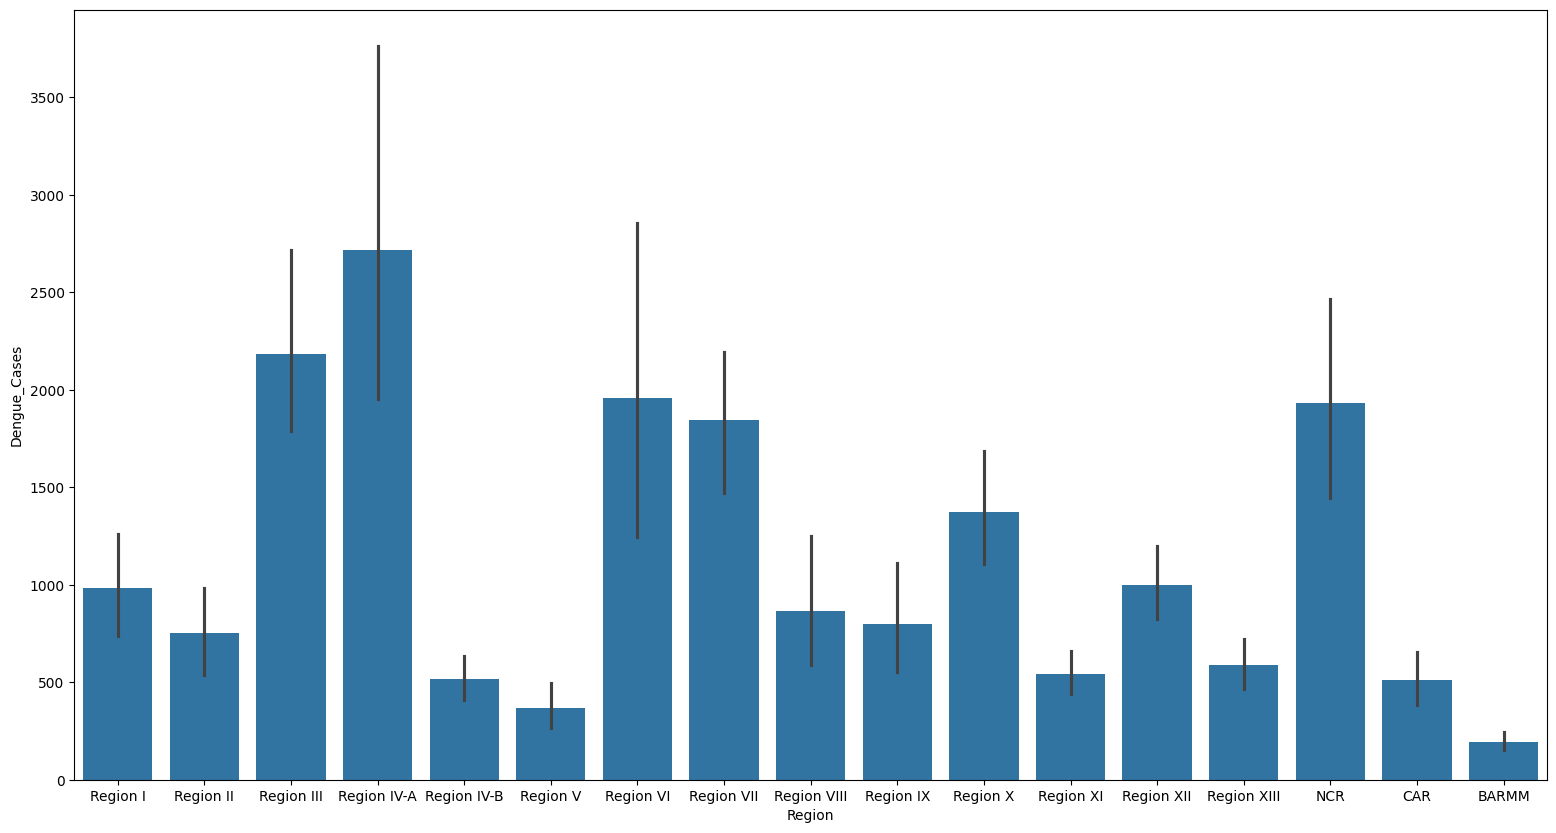

In [11]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight No. 4</h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h2> Insight No. 5</h2>
<p> The bar chart reveals that some regions report significantly lower dengue cases. Regions like CAR (Cordillera Administrative Region) and Region IV-B (MIMAROPA) show fewer cases, possibly due to their lower population density, cooler highland climates, or better environmental conditions that limit mosquito breeding. These areas may also have more effective community-level vector control or less urban congestion, reducing the risk of outbreaks.

<h1> Mortality Rate per each Region </h1>

In [12]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [13]:
Regional_Death

Region  Dengue_Deaths  Dengue_Cases
0         BARMM            332         11537
1           CAR           1008         30582
2           NCR           4008        115966
3      Region I            157         59066
4     Region II            193         45141
5    Region III            482        131064
6   Region IV-A            652        163029
7   Region IV-B            130         30849
8     Region IX            532         47781
9      Region V            185         22167
10    Region VI           1825        117523
11   Region VII           1760        110683
12  Region VIII            585         51983
13     Region X            848         82437
14    Region XI            385         32522
15   Region XII           2796         59802
16  Region XIII            966         35293

In [14]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [15]:
Regional_Death

Region  Dengue_Deaths  Dengue_Cases  Mortality_Rate
0         BARMM            332         11537            2.88
1           CAR           1008         30582            3.30
2           NCR           4008        115966            3.46
3      Region I            157         59066            0.27
4     Region II            193         45141            0.43
5    Region III            482        131064            0.37
6   Region IV-A            652        163029            0.40
7   Region IV-B            130         30849            0.42
8     Region IX            532         47781            1.11
9      Region V            185         22167            0.83
10    Region VI           1825        117523            1.55
11   Region VII           1760        110683            1.59
12  Region VIII            585         51983            1.13
13     Region X            848         82437            1.03
14    Region XI            385         32522            1.18
15   Region XII           2796         59802            4.68
16  Region XIII            966         35293            2.74

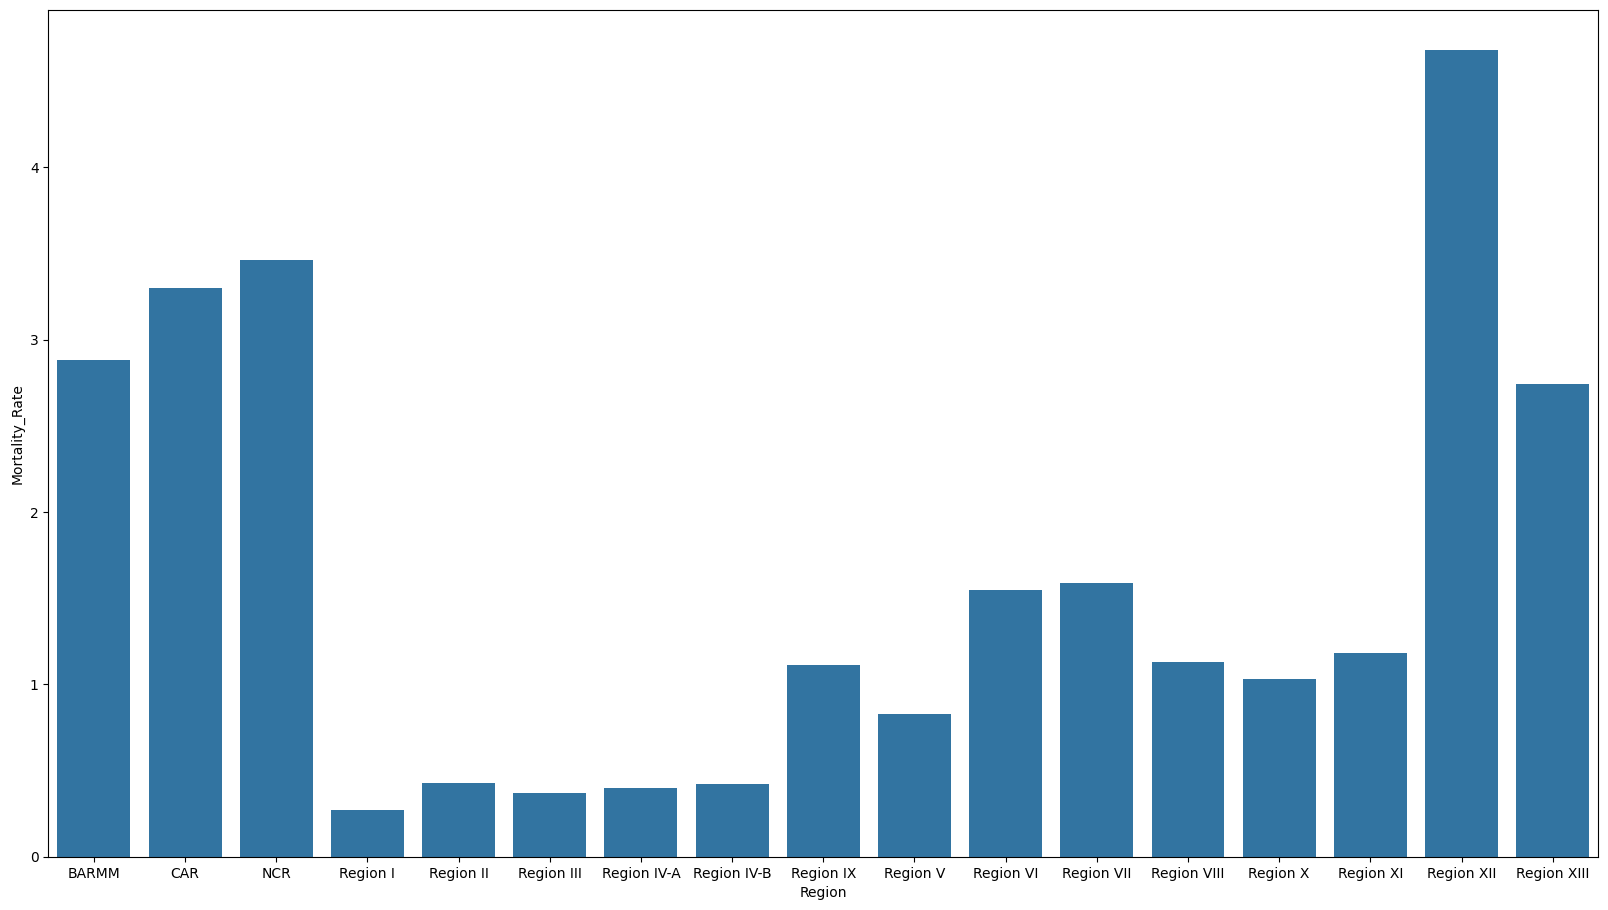

In [16]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight No. 6</h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

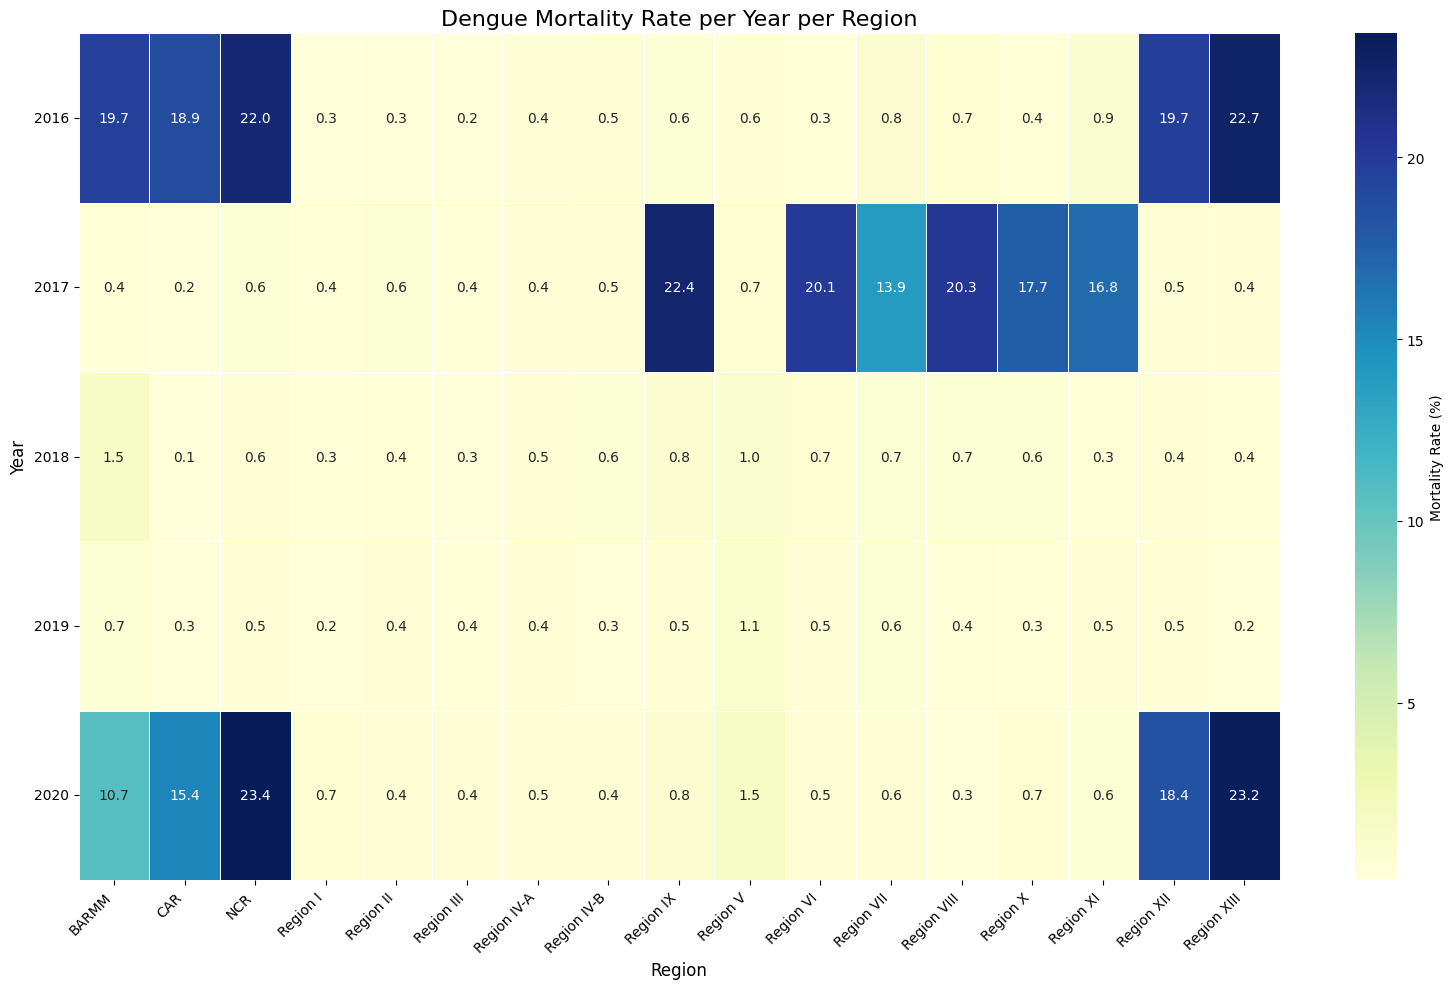

In [17]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight No. 7 </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h2> Insight No. 8 </h2><br>
<p> The heatmap shows that regions with high dengue mortality rates in a given year often experience a decrease in the following year. This pattern suggests that after an outbreak, increased public health response, community awareness, and vector control efforts likely help reduce cases and deaths. Additionally, population-level immunity may rise post-outbreak, contributing to fewer severe cases in the succeeding year.

<h2> Insight No. 9 </h2><br>
Despite recording a high number of dengue cases, Region IV-A maintains a notably low mortality rate, highlighting its efficient healthcare response, early case detection, and widespread access to treatment. 
<h2> Insight No. 10 </h2><br>
In contrast, the National Capital Region (NCR), while also having high case numbers, shows a higher mortality rate, likely due to overburdened health facilities, high population density, and slower access to care during outbreak peaks. This contrast suggests that healthcare accessibility and system pressure play a more critical role in mortality outcomes than case numbers alone.

<h1>Dengue Cases per year</h1>

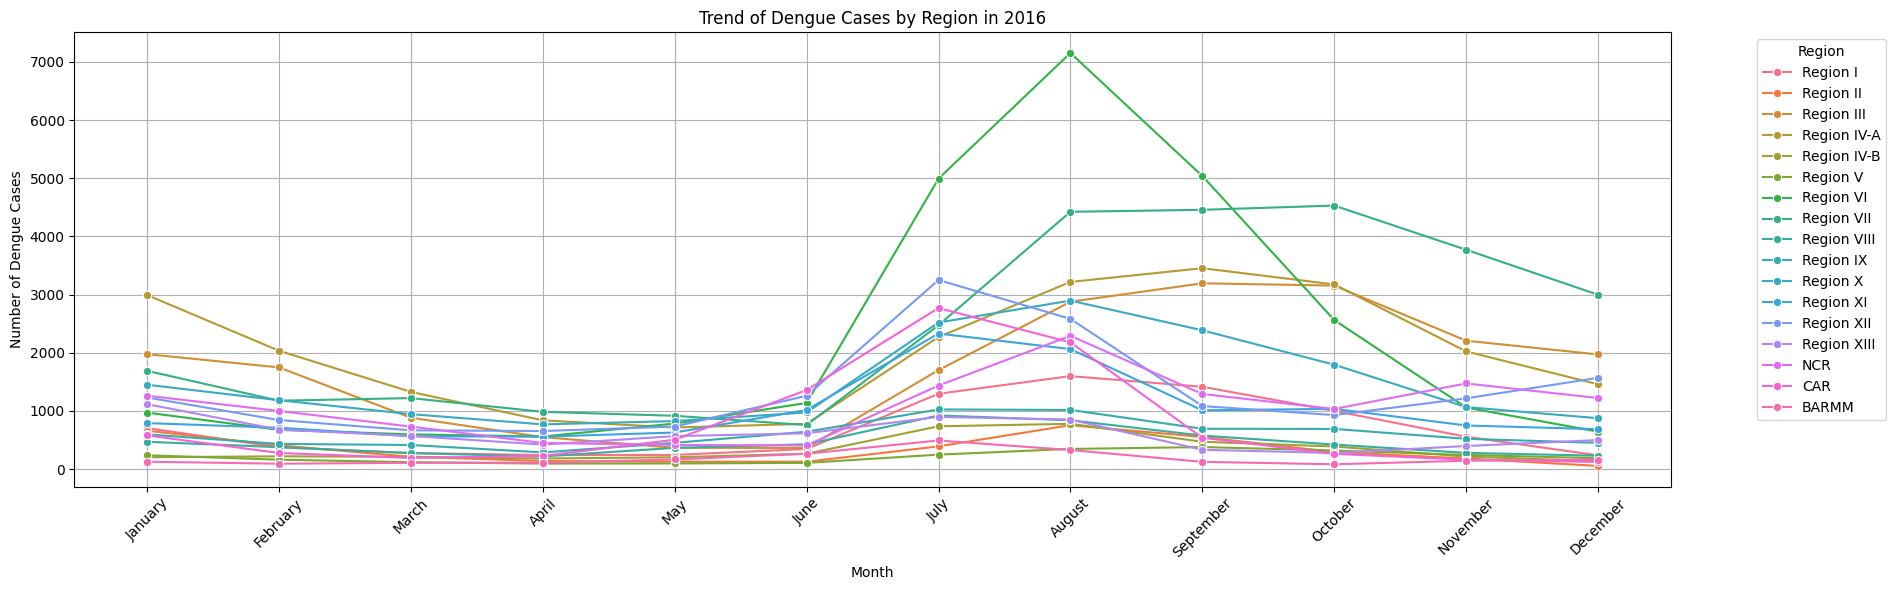

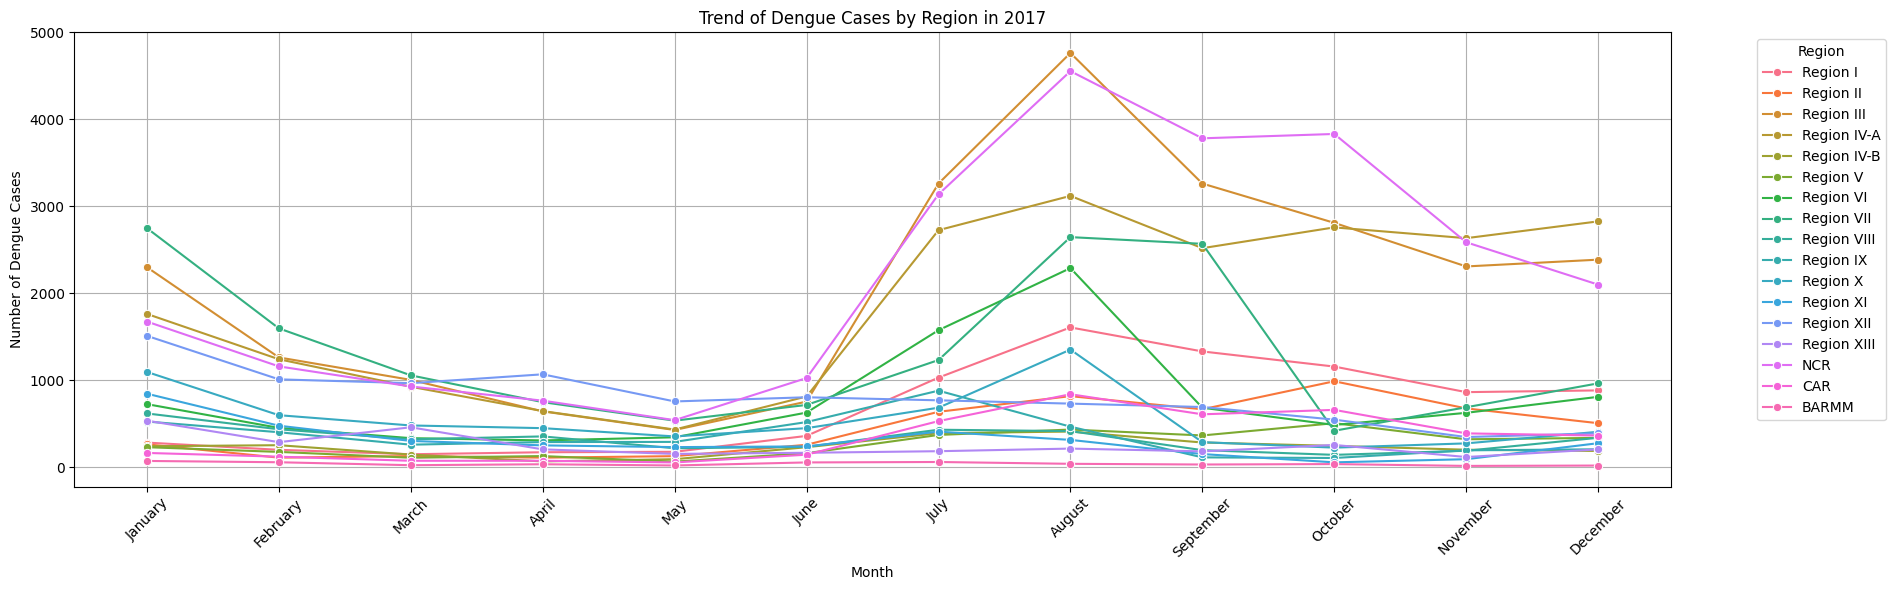

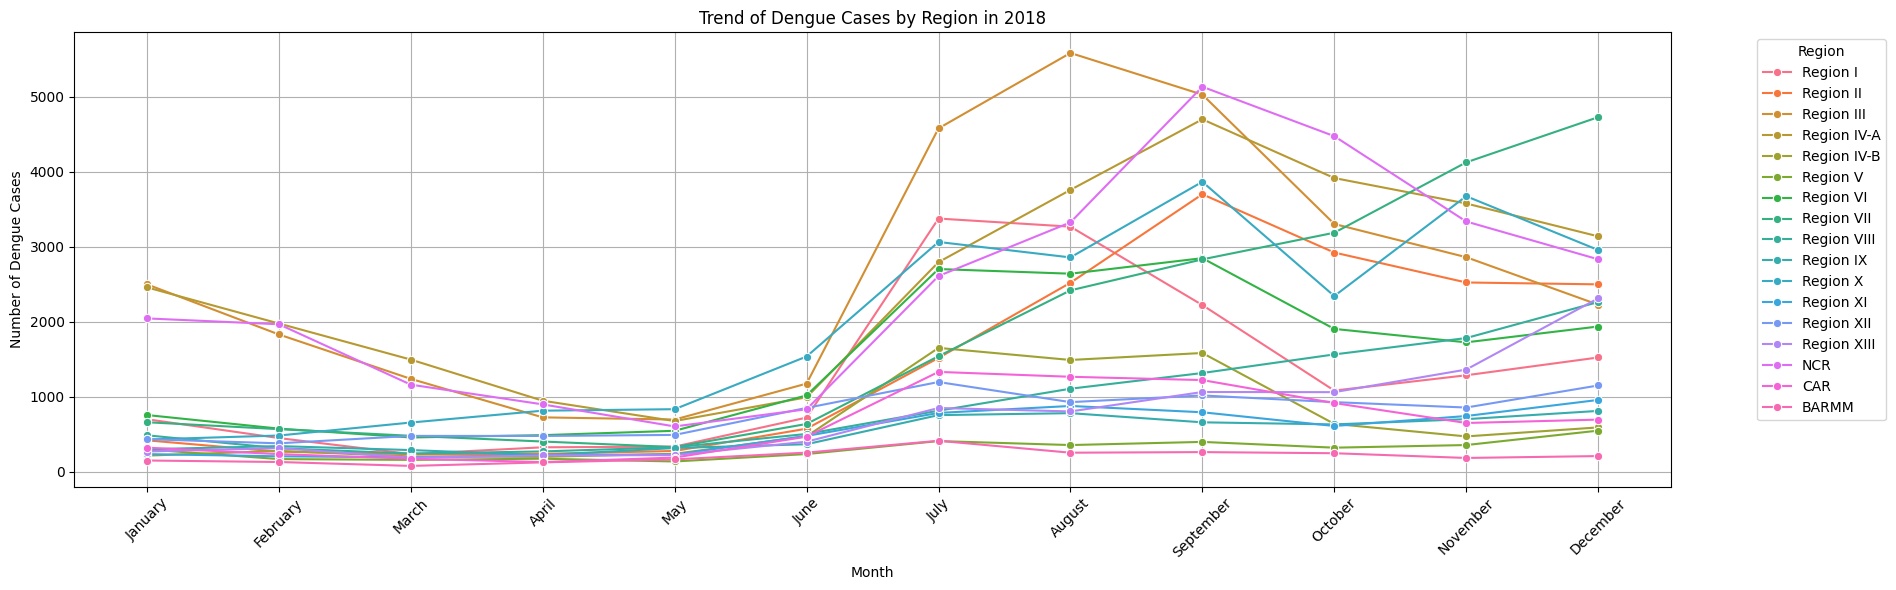

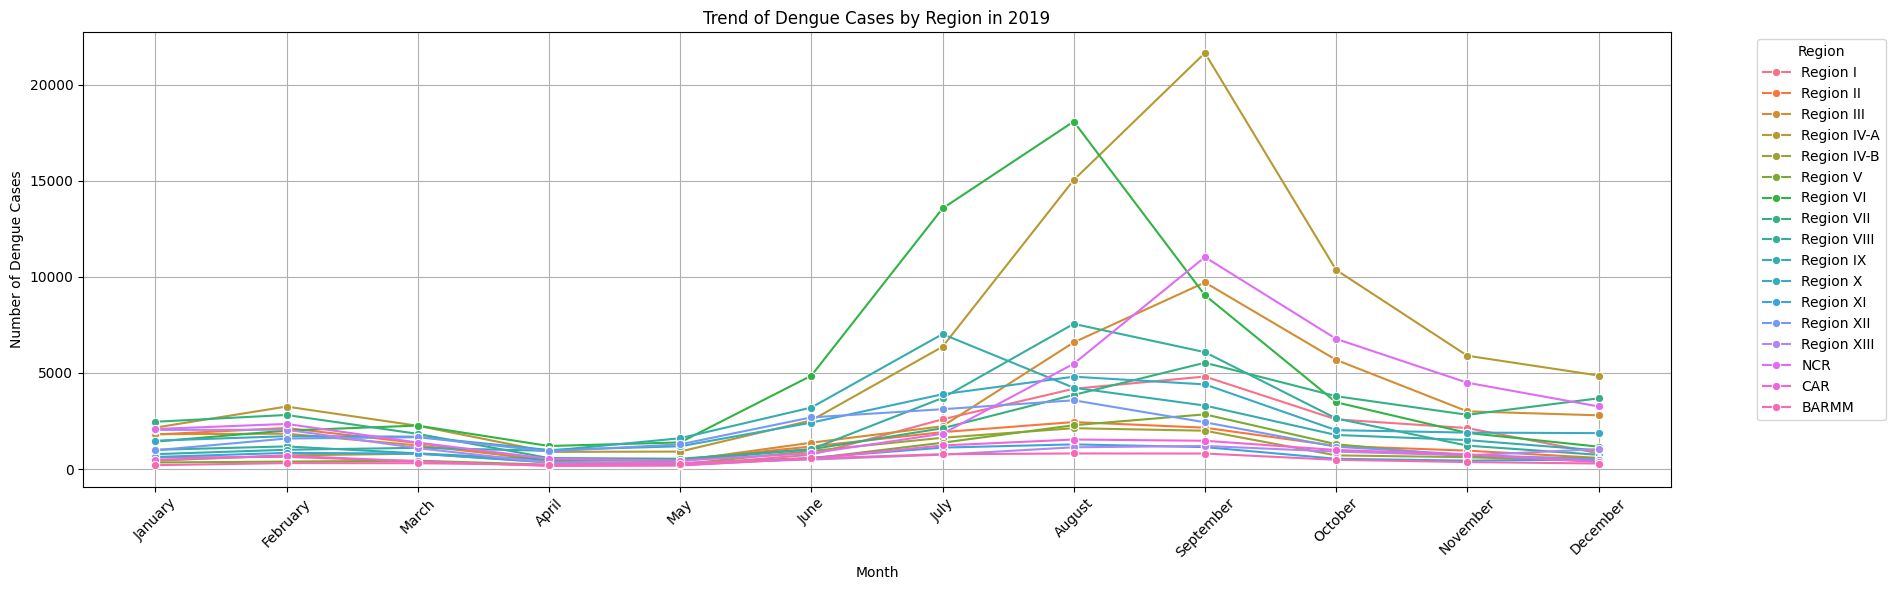

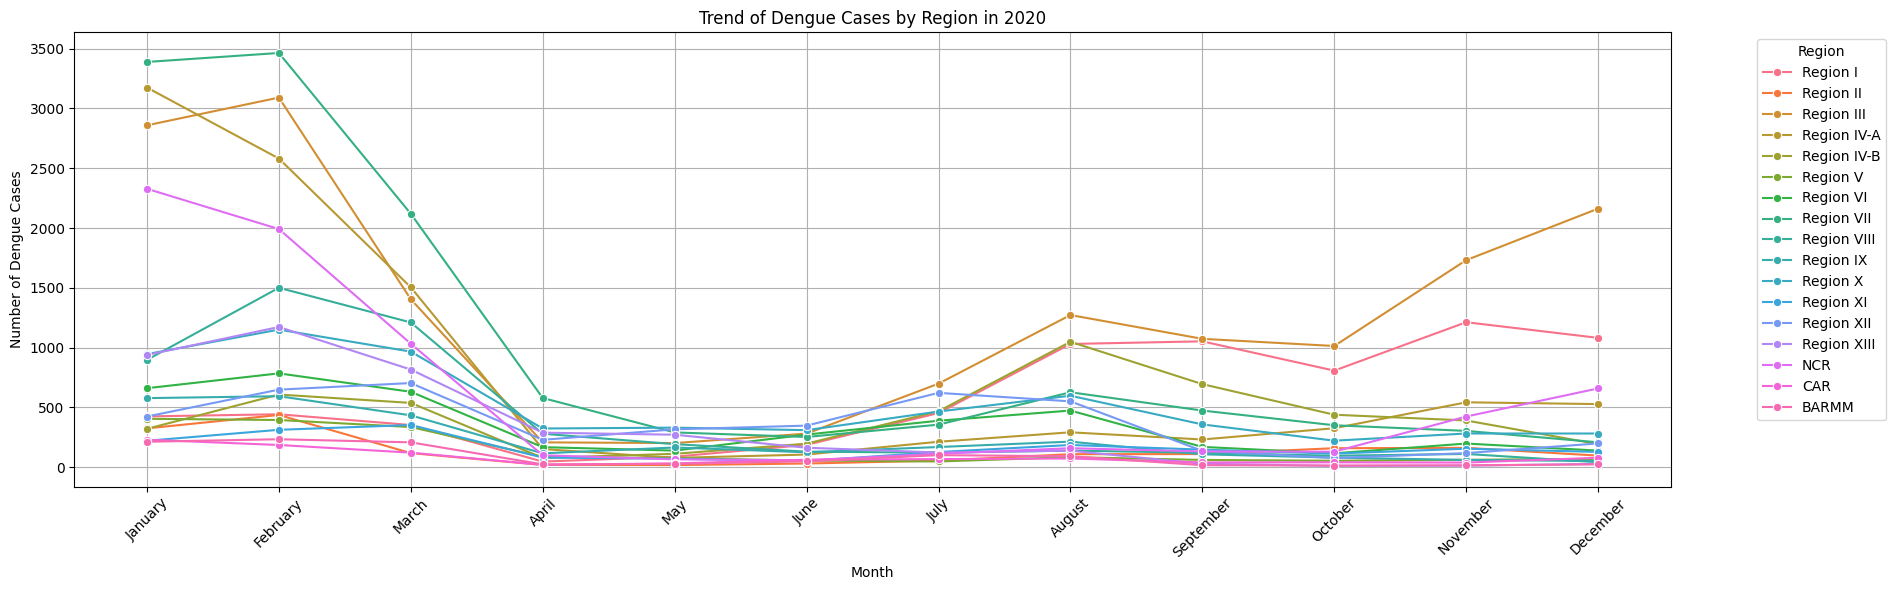

In [18]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

years = dengue['Year'].unique()

for year in sorted(years):
    year_data = dengue[dengue['Year'] == year]

    plt.figure(figsize=(19, 6))
    sns.lineplot(data=year_data, x="Month", y="Dengue_Cases", hue="Region", marker='o')
    plt.title(f'Trend of Dengue Cases by Region in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Dengue Cases')
    plt.xticks(rotation=45)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<h1>Insight No. 11</h1>
<p>The trend of dengue cases across regions from 2016 to 2020 shows a consistent spike during the middle of the year, particularly from June to August—coinciding with the rainy season in the Philippines. Regions like NCR, Region III, and Region VI often reported higher case numbers compared to others. This indicates that densely populated and urbanized areas or those with poor drainage systems may be more vulnerable to outbreaks. The data also reflects yearly fluctuations, possibly influenced by public health efforts, changes in reporting, or environmental factors.

<h1>Insight No. 12</h1>
<p>In 2020, a noticeable spike in dengue cases occurred as early as January—unlike other years. This unusual surge may be due to residual effects from the major outbreak in 2019, where high mosquito populations and virus transmission carried over into the new year. Additionally, increased awareness and reporting following the 2019 outbreak could have contributed to more cases being recorded early in 2020.

<h1>Dengue Deaths per Year

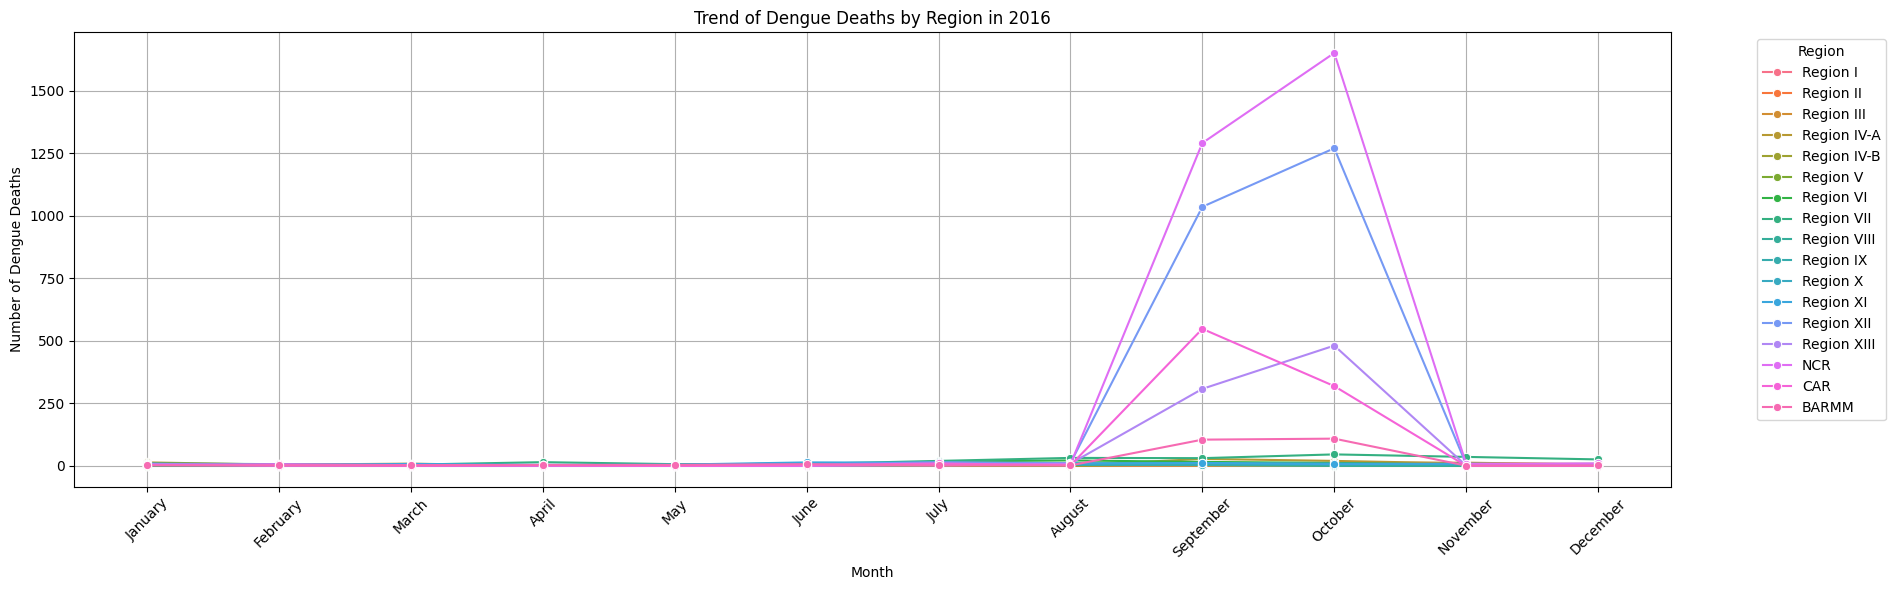

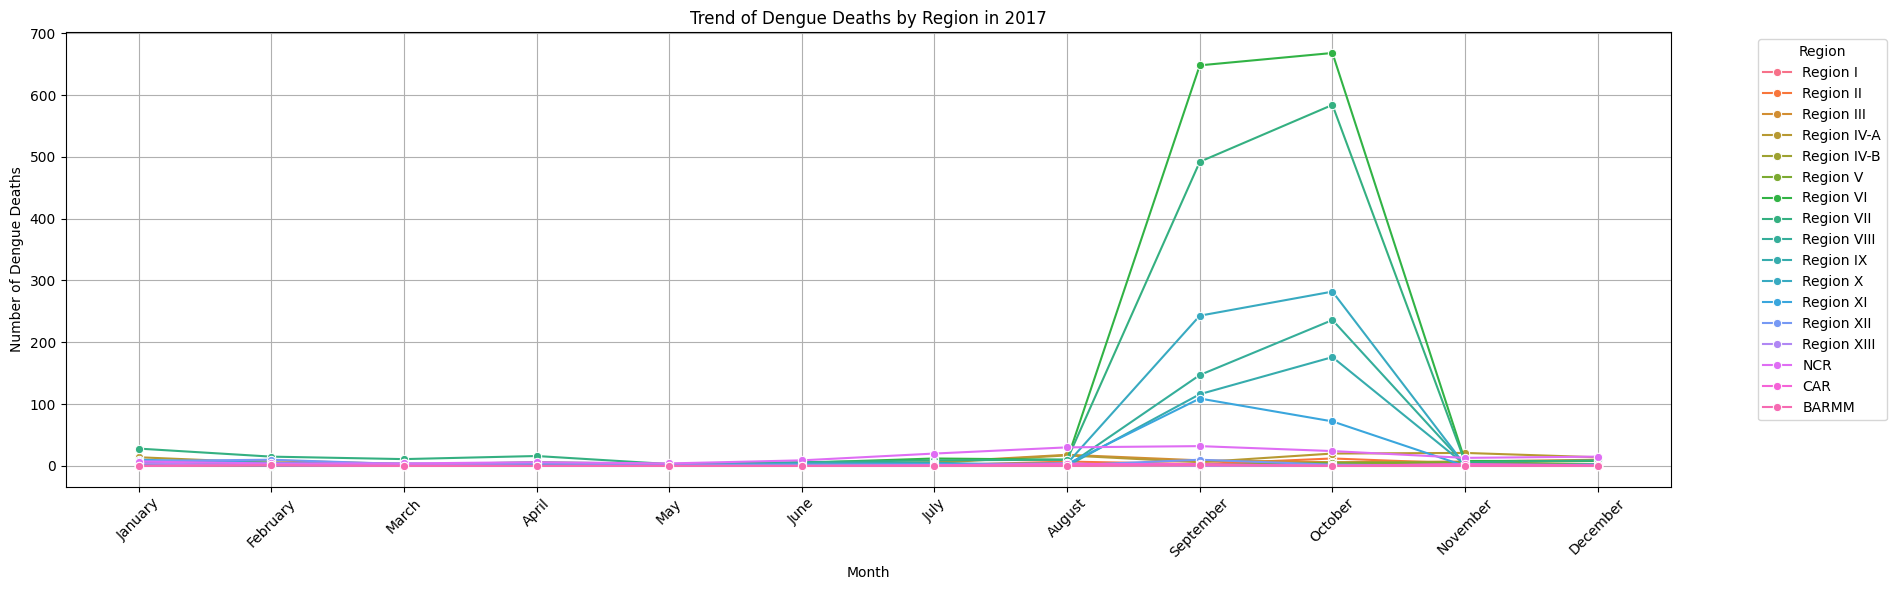

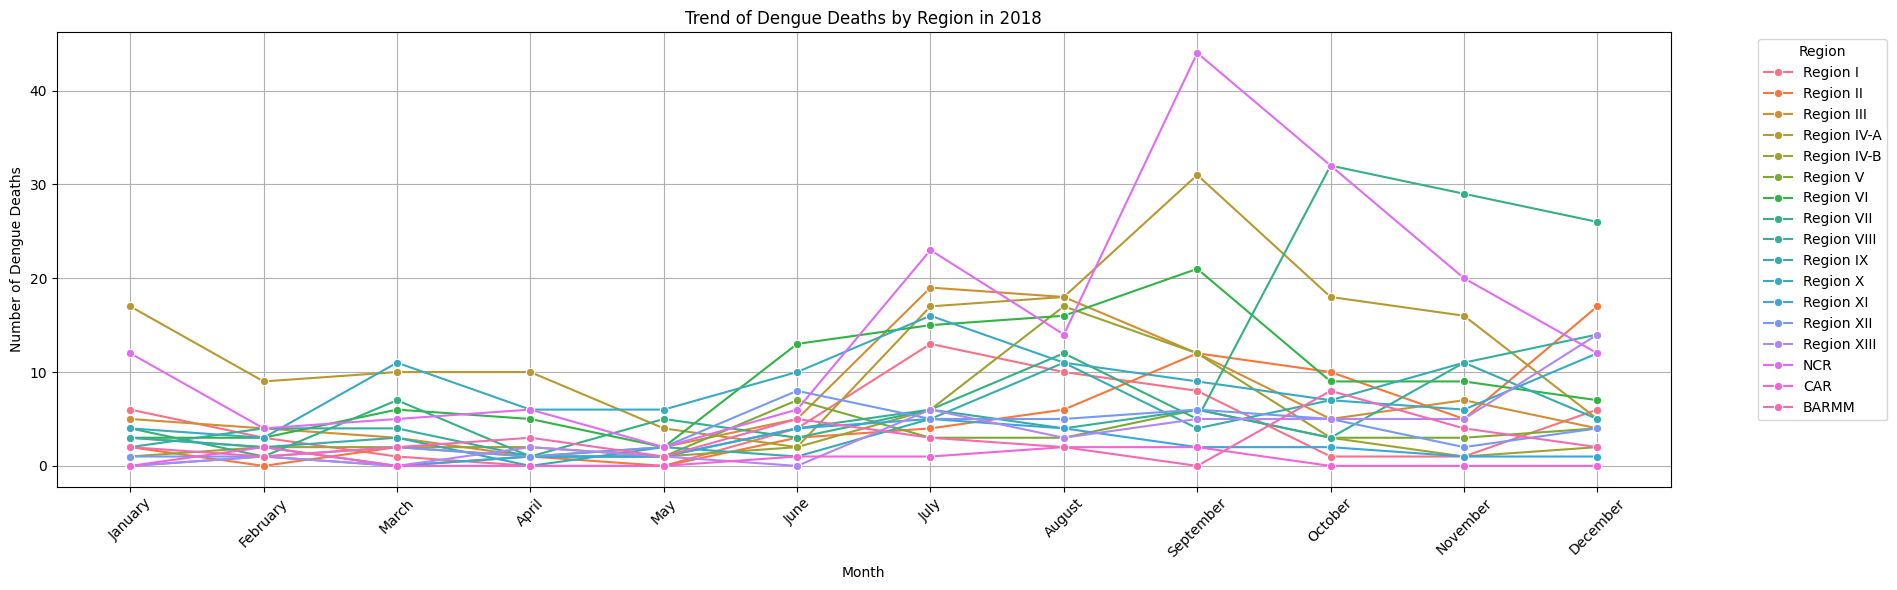

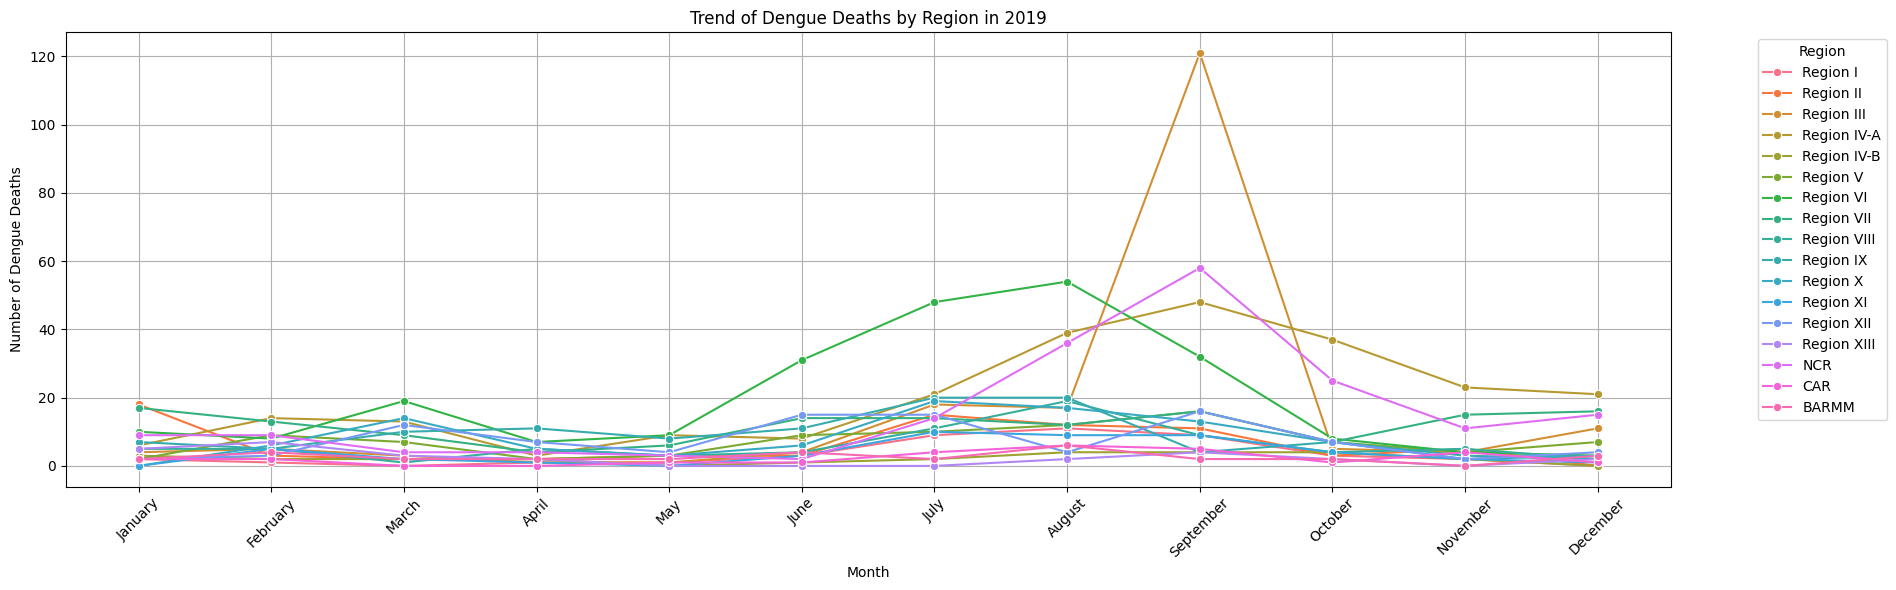

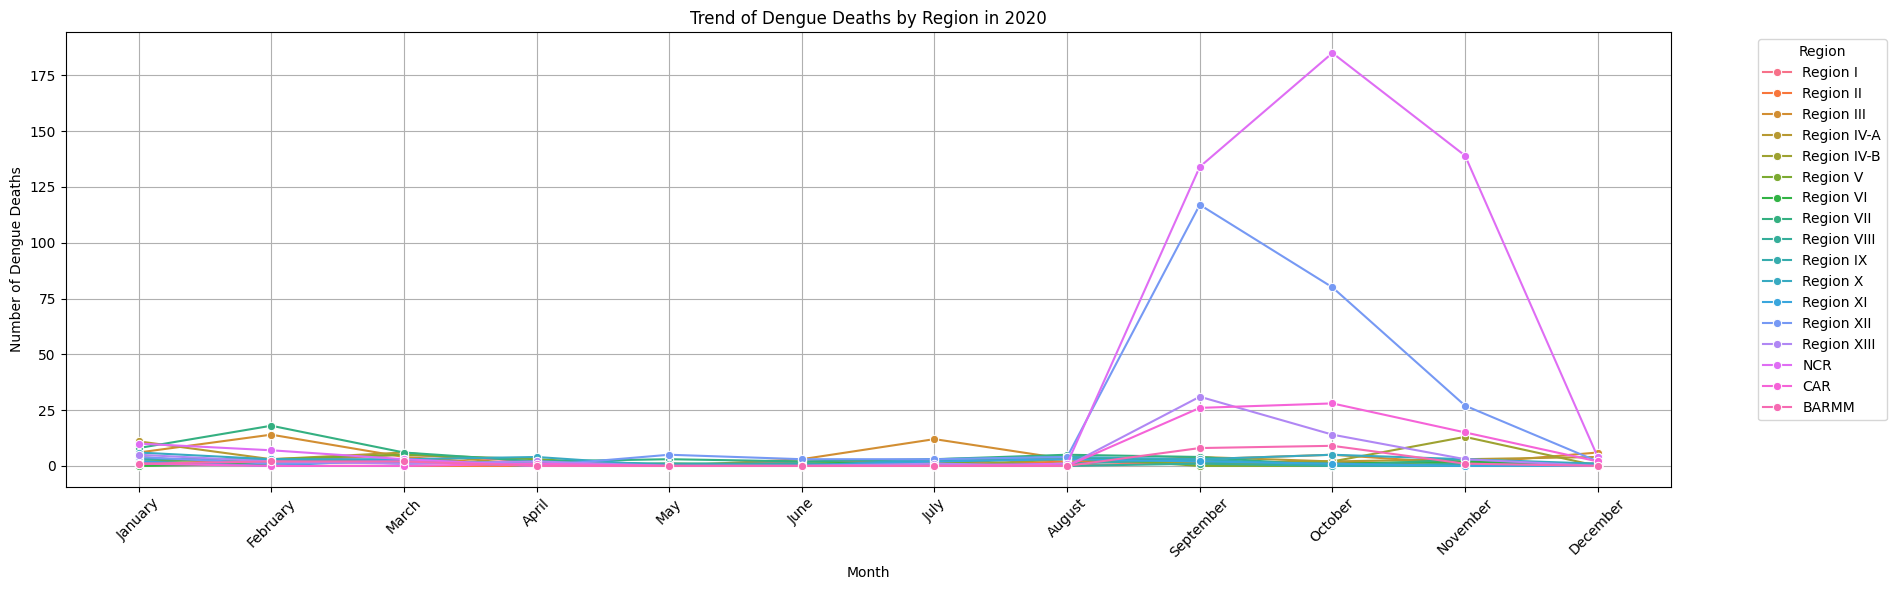

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

years = dengue['Year'].unique()

for year in sorted(years):
    year_data = dengue[dengue['Year'] == year]

    plt.figure(figsize=(19, 6))
    sns.lineplot(data=year_data, x="Month", y="Dengue_Deaths", hue="Region", marker='o')
    plt.title(f'Trend of Dengue Deaths by Region in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Dengue Deaths')
    plt.xticks(rotation=45)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<h1>Insight No. 13</h1>
<p>From 2016 to 2020, dengue deaths consistently peaked between June and August, aligning with the rainy season. Regions like NCR, Region III, and Region VI often had the highest deaths, likely due to high population density and poor drainage. Yearly fluctuations suggest the influence of climate, public health measures, and reporting practices.

<h1>Insight No. 12</h1>
<p>Dengue deaths are lower in other months, especially from November to April, due to drier weather conditions that reduce mosquito breeding. With fewer stagnant water sources, mosquito populations drop, leading to fewer infections and deaths. Cooler temperatures during these months may also slow mosquito activity and virus transmission.

<h1>Insight No. 13</h1>
<p>In 2018, the trend of dengue deaths appears jumbled or inconsistent across months and regions, lacking the clear mid-year peak seen in other years. This irregular pattern could be due to sporadic local outbreaks, inconsistent reporting, or varying effectiveness of health interventions across regions. It's also possible that climatic factors like uneven rainfall or temperature shifts disrupted the usual seasonal cycle of dengue transmission that year.

<h1>Line plot per region</h1>

In [20]:
dengue.dtypes

Month             category
Year                 int64
Region              object
Dengue_Cases         int64
Dengue_Deaths        int64
Mortality_Rate     float64
dtype: object

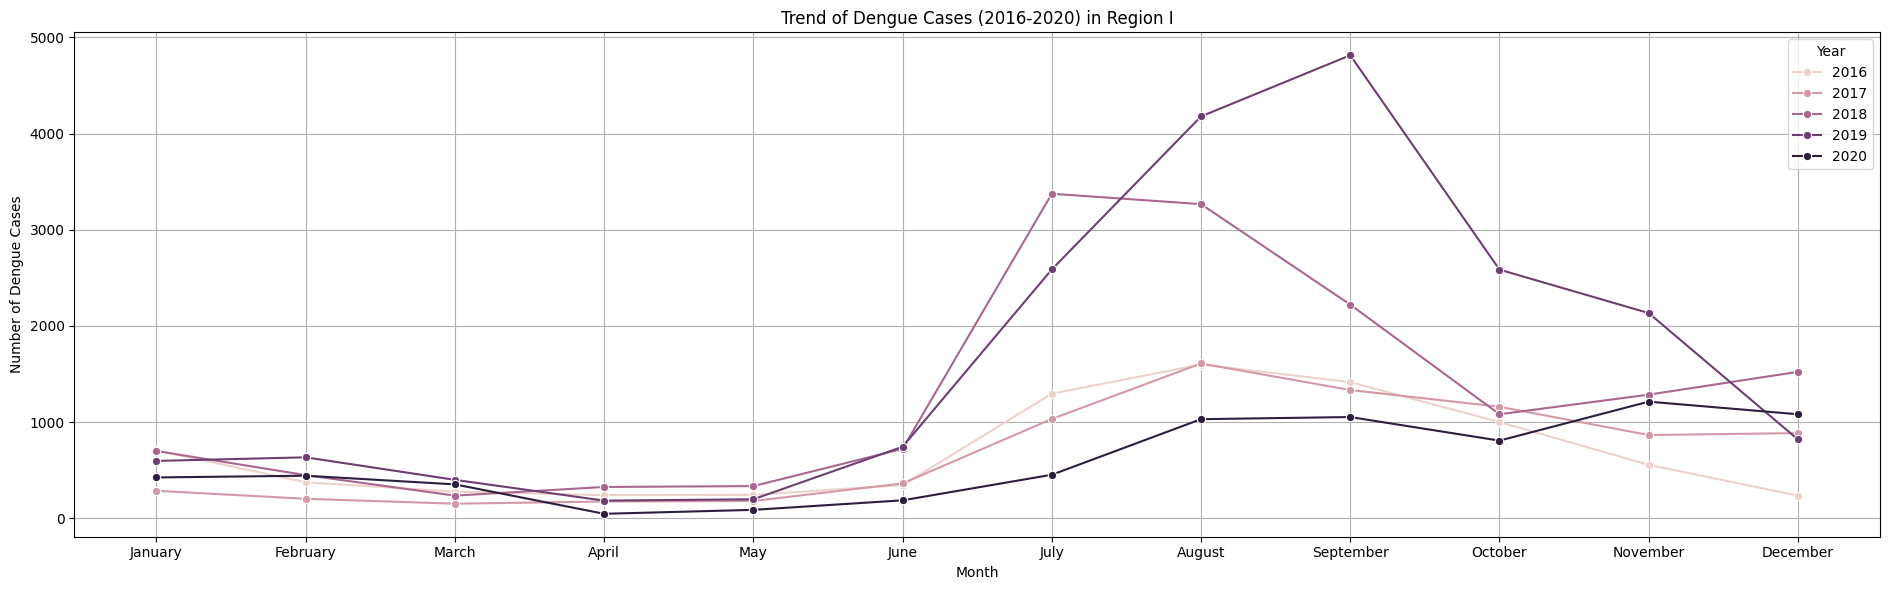

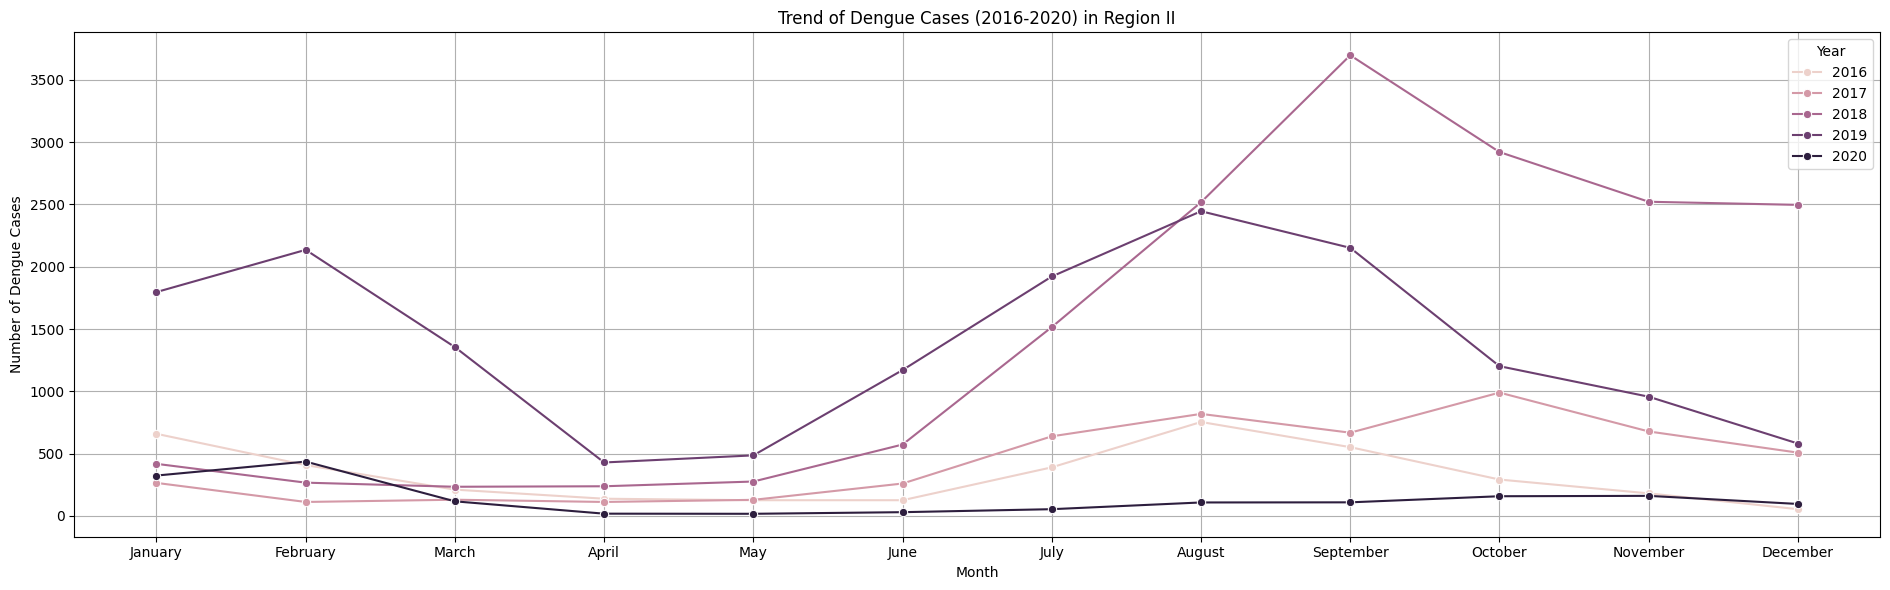

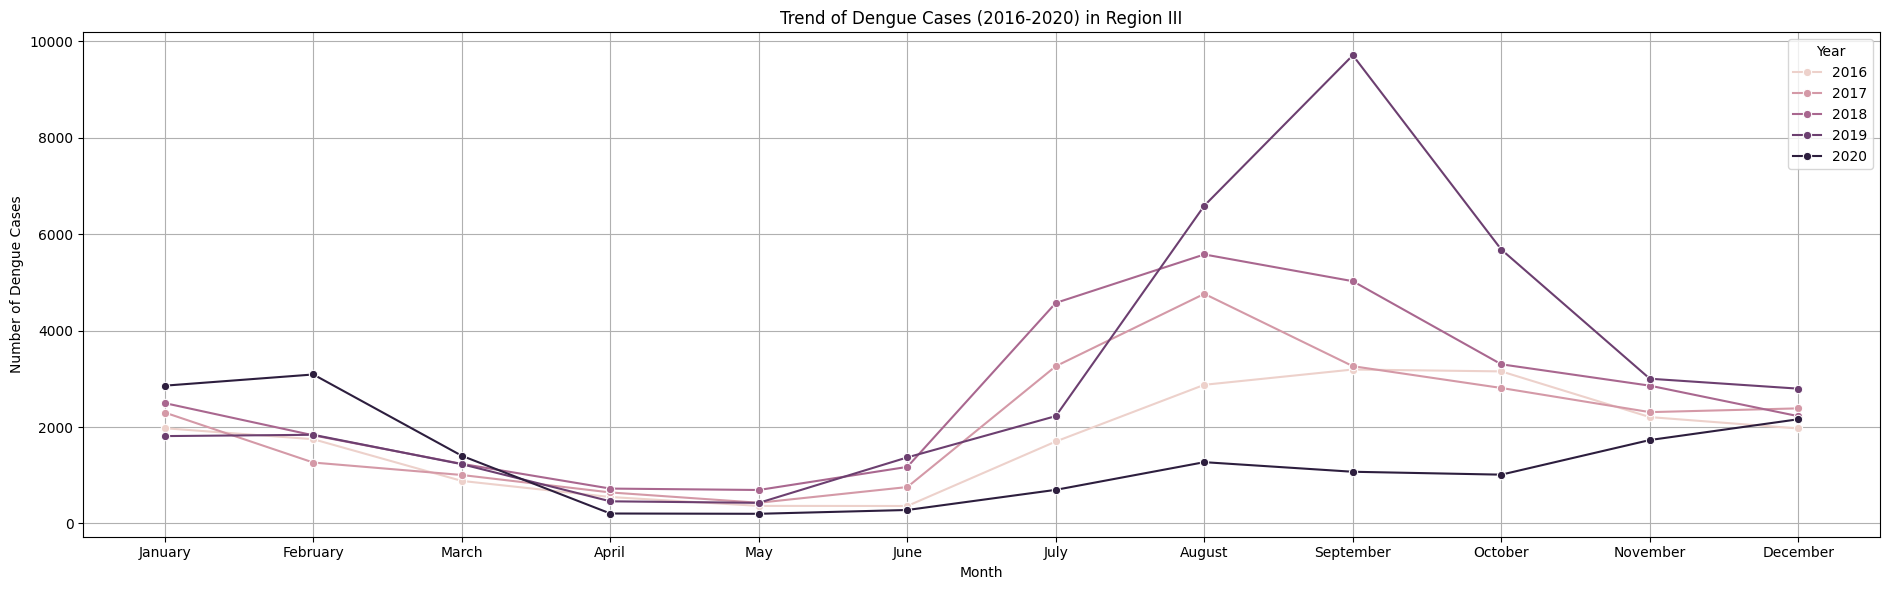

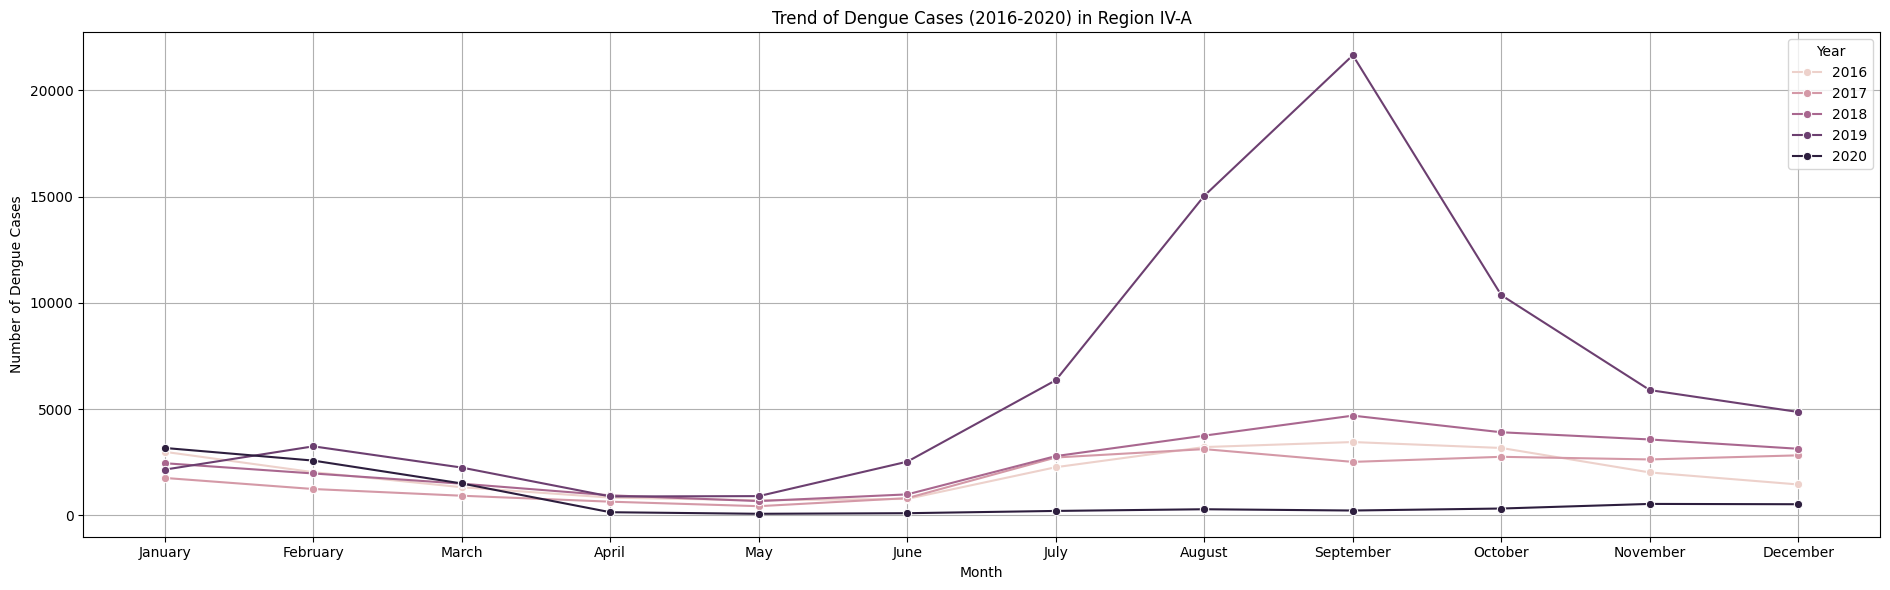

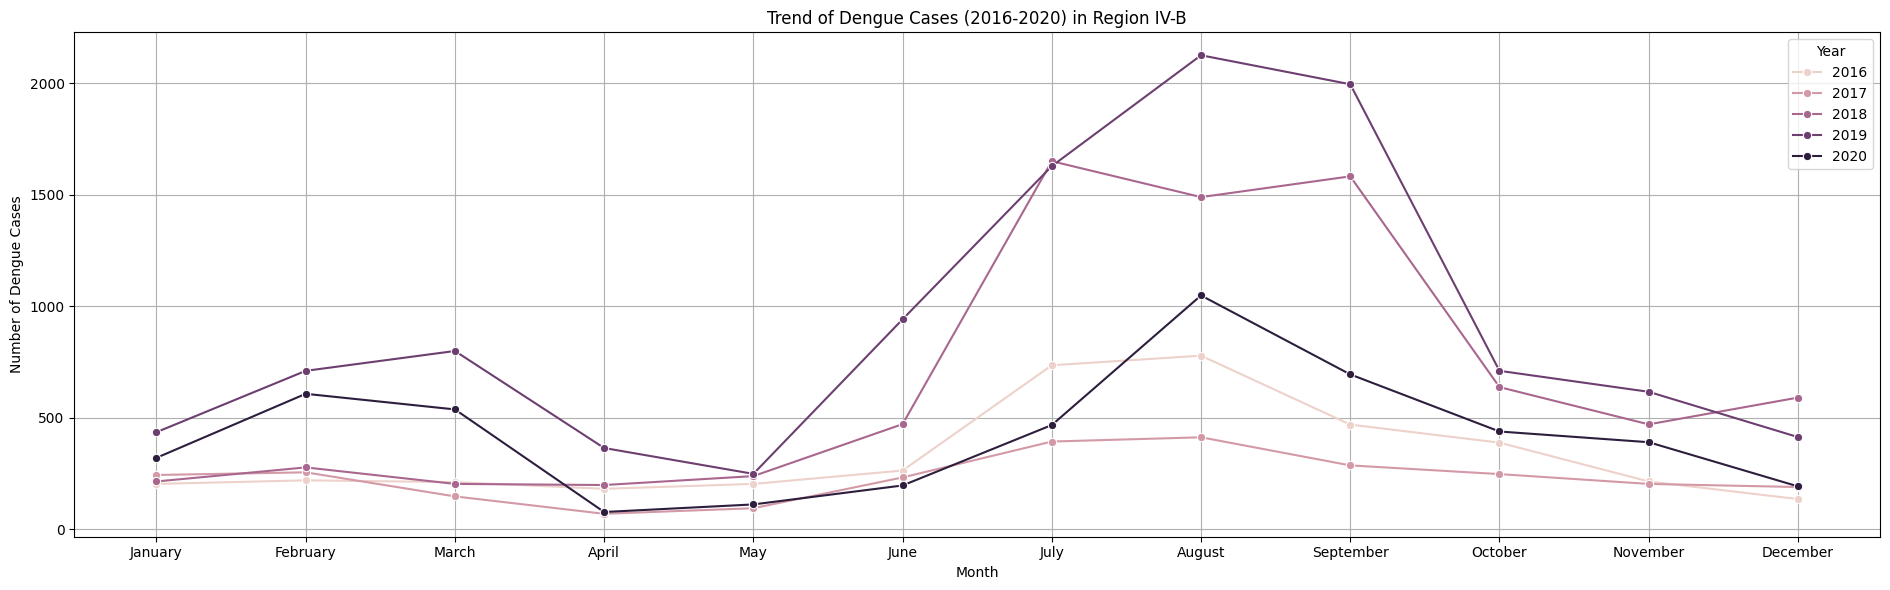

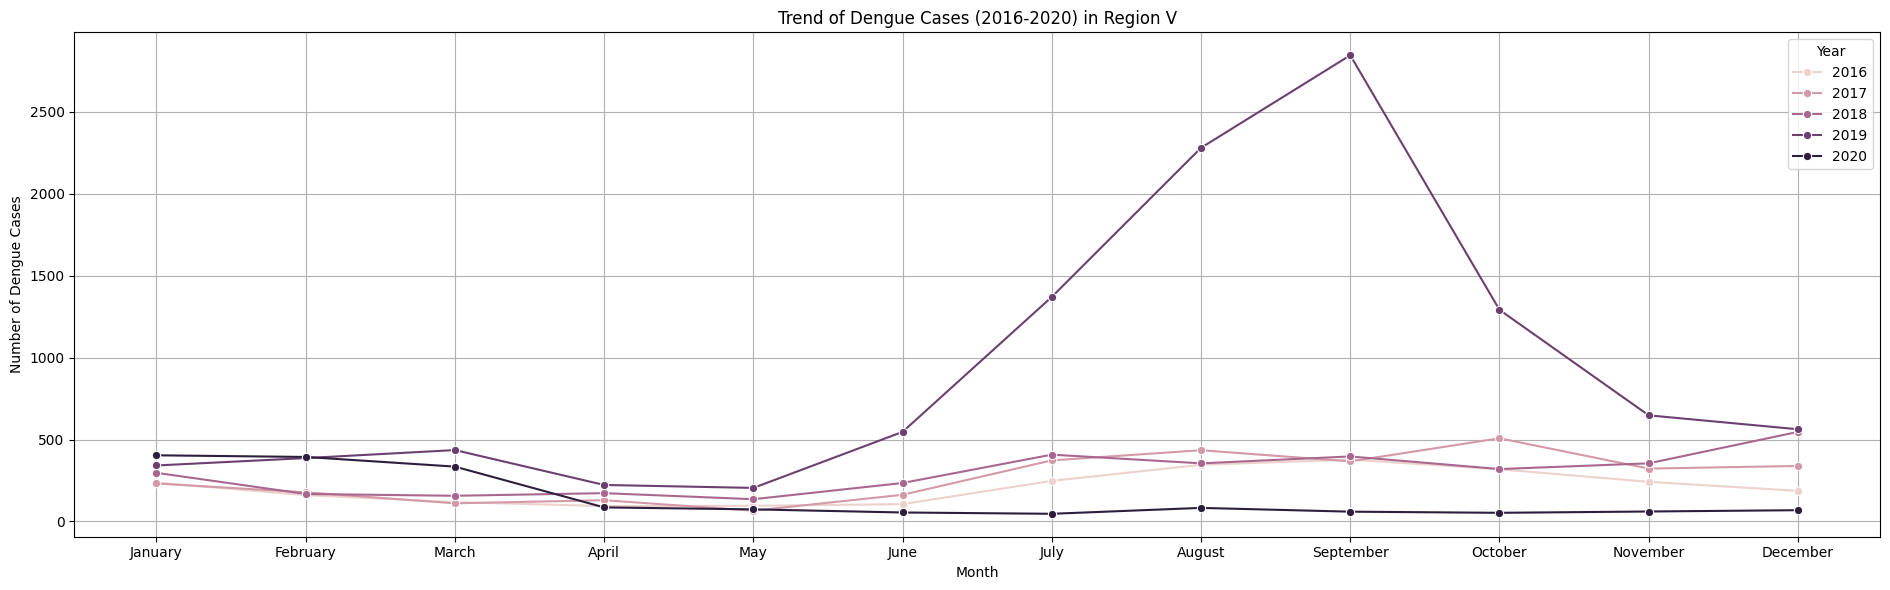

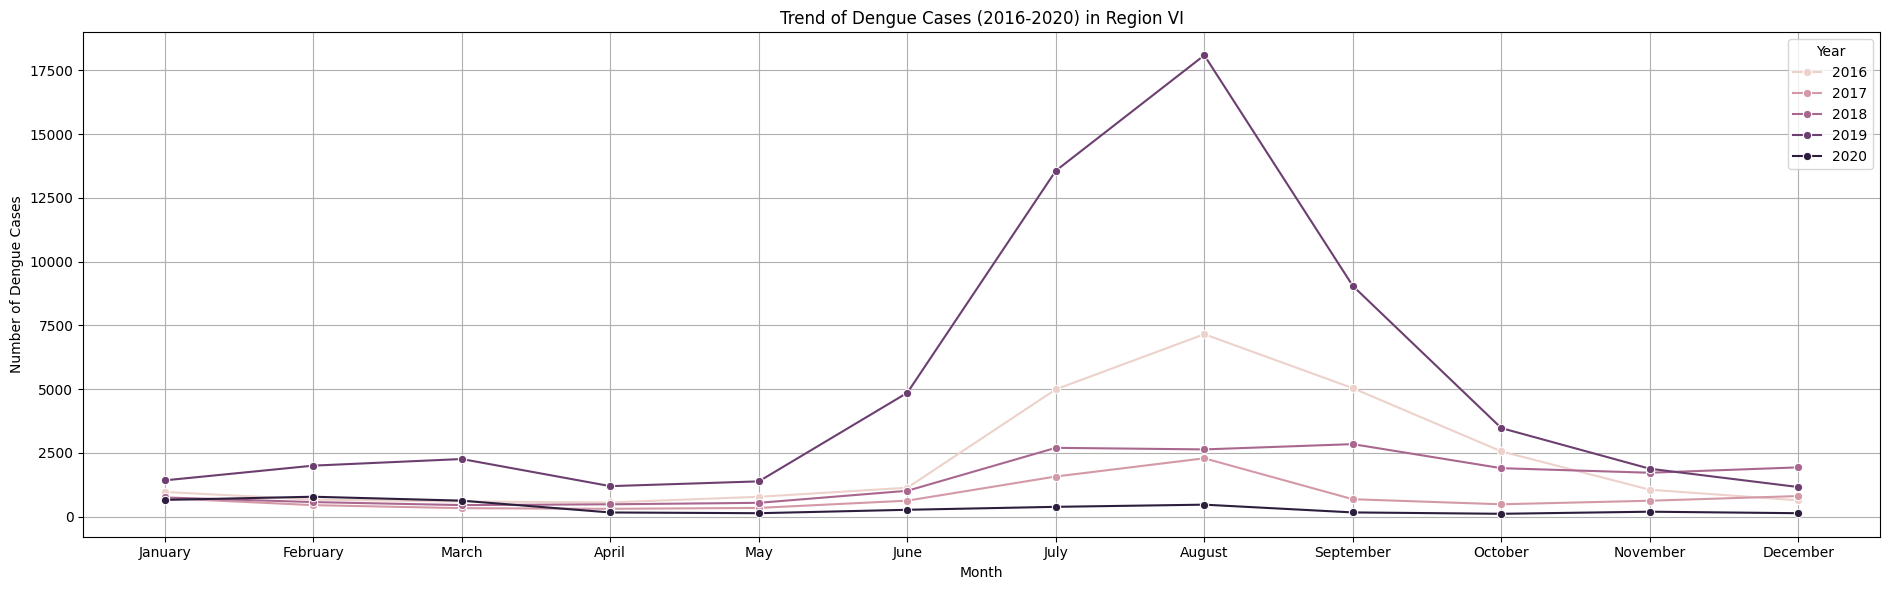

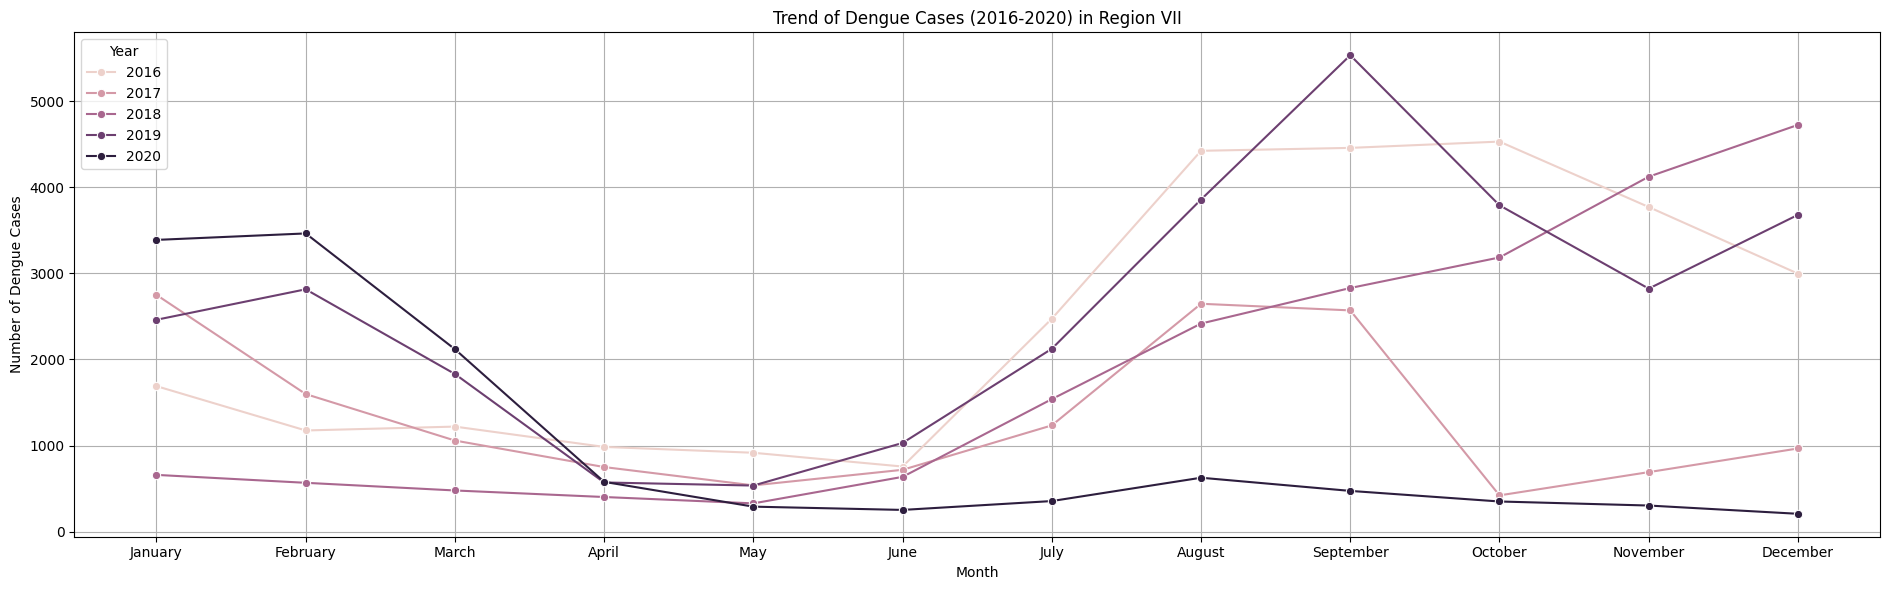

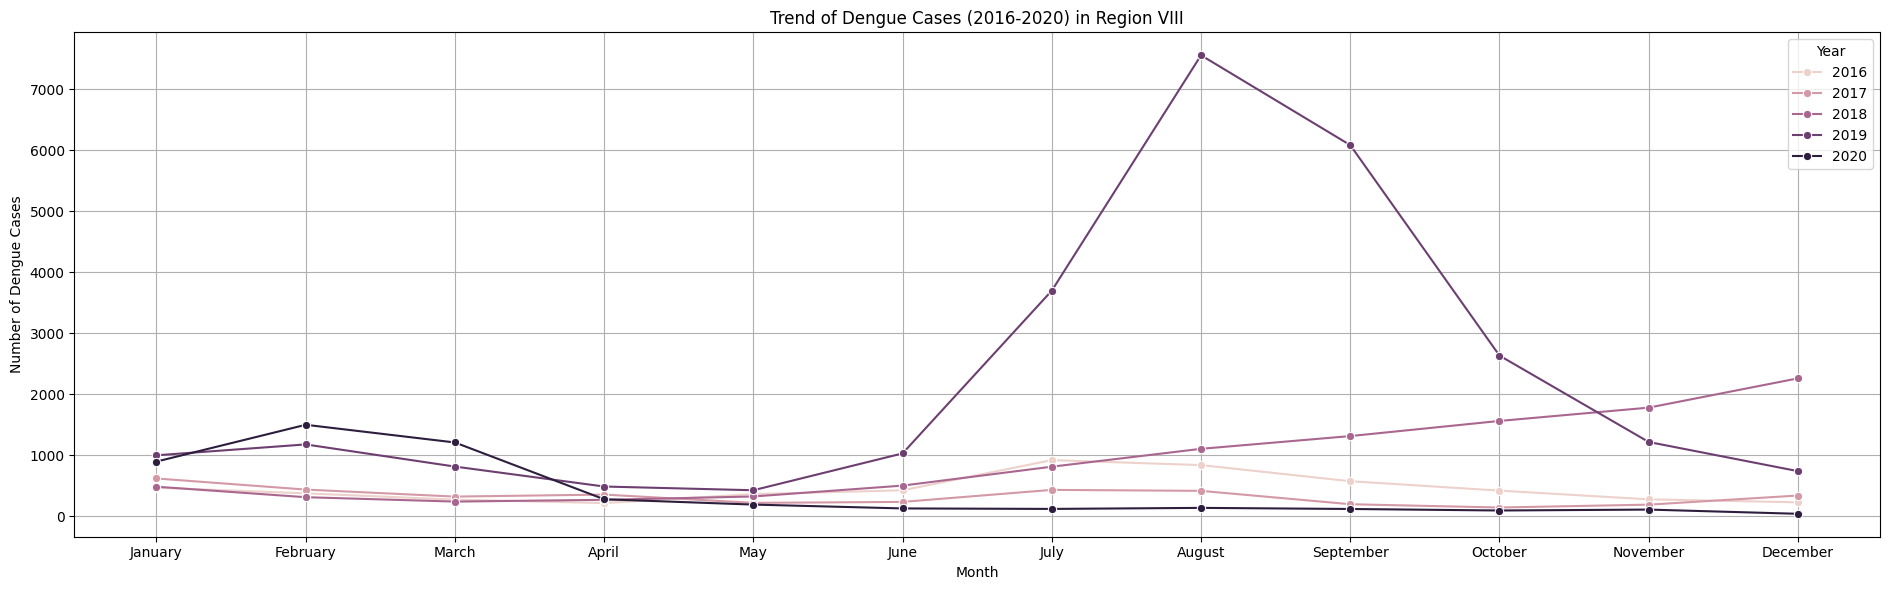

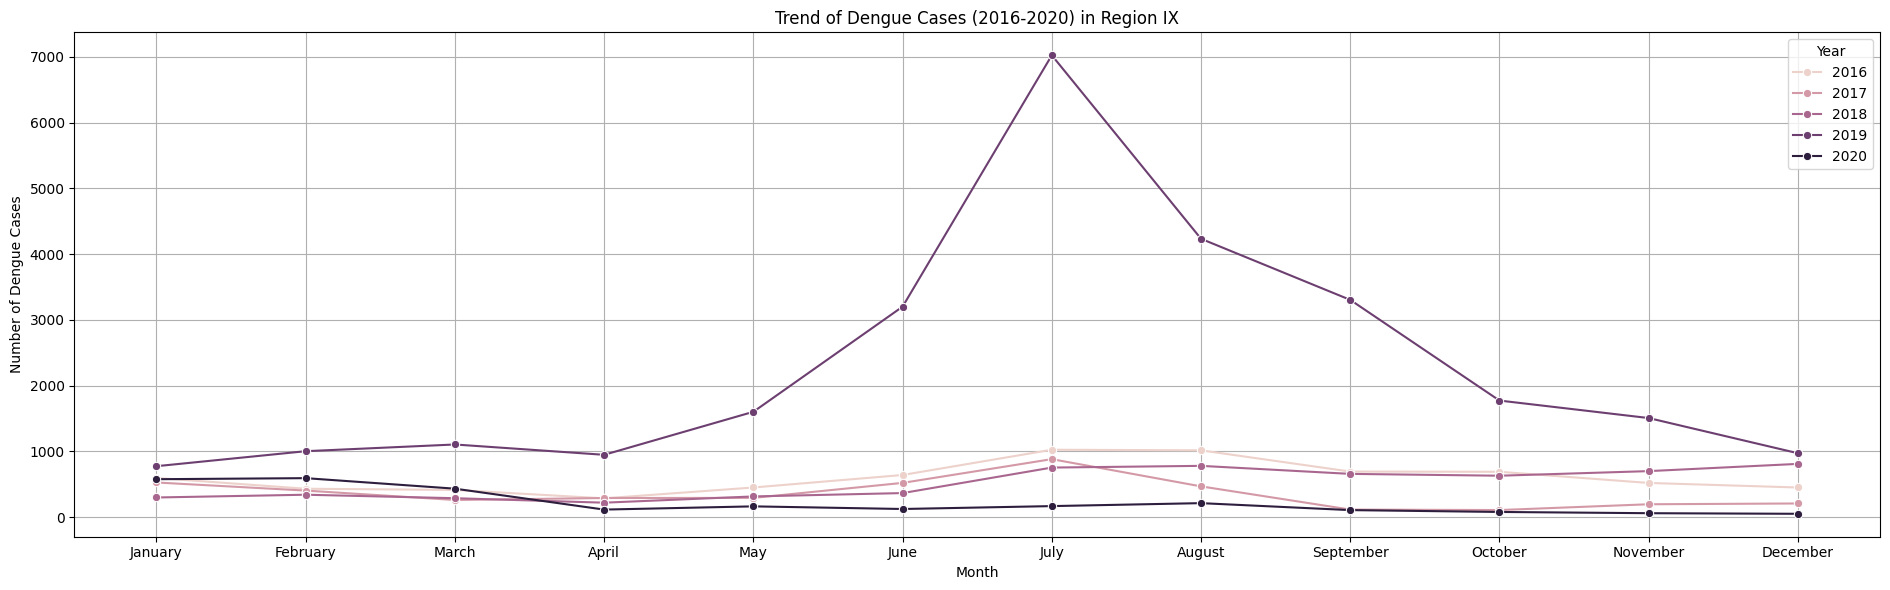

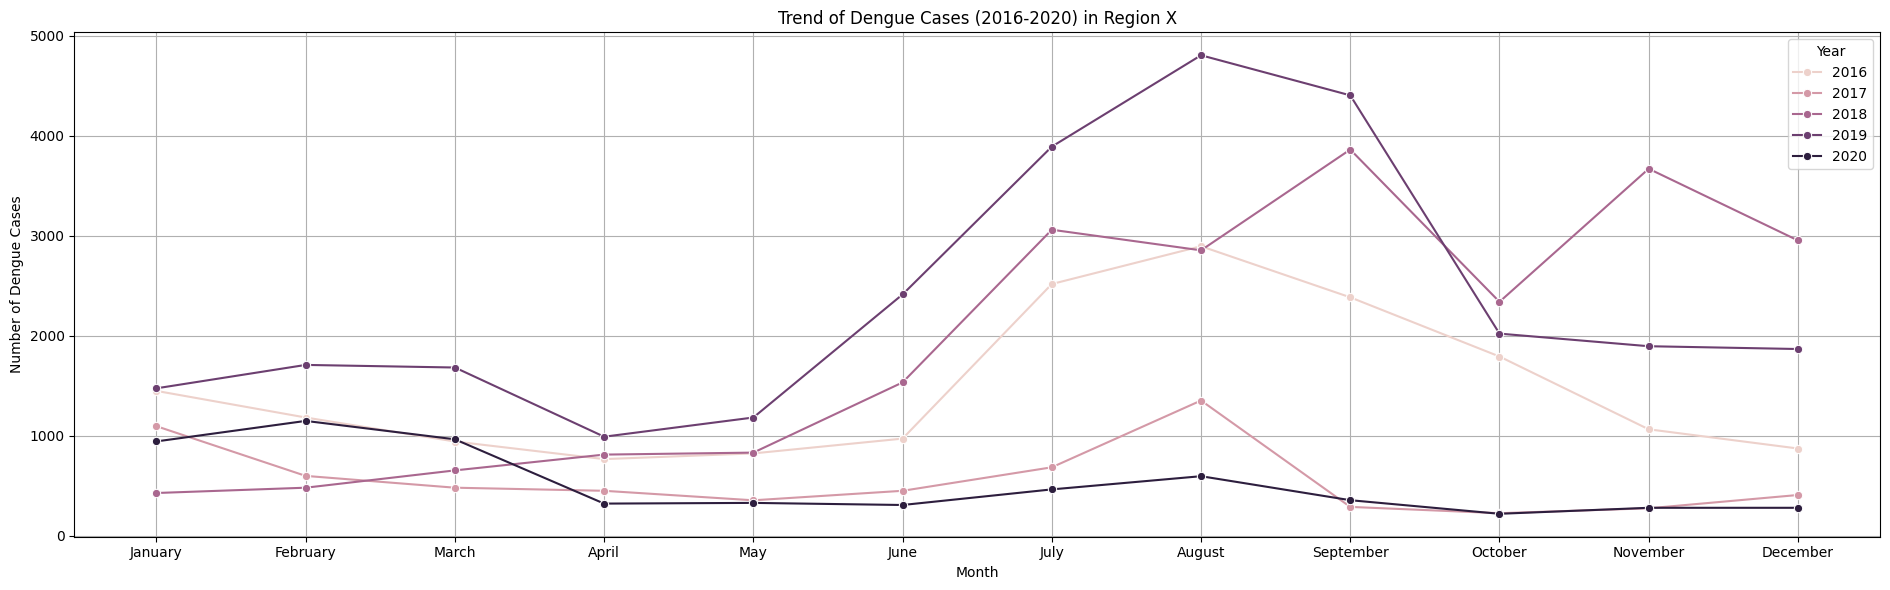

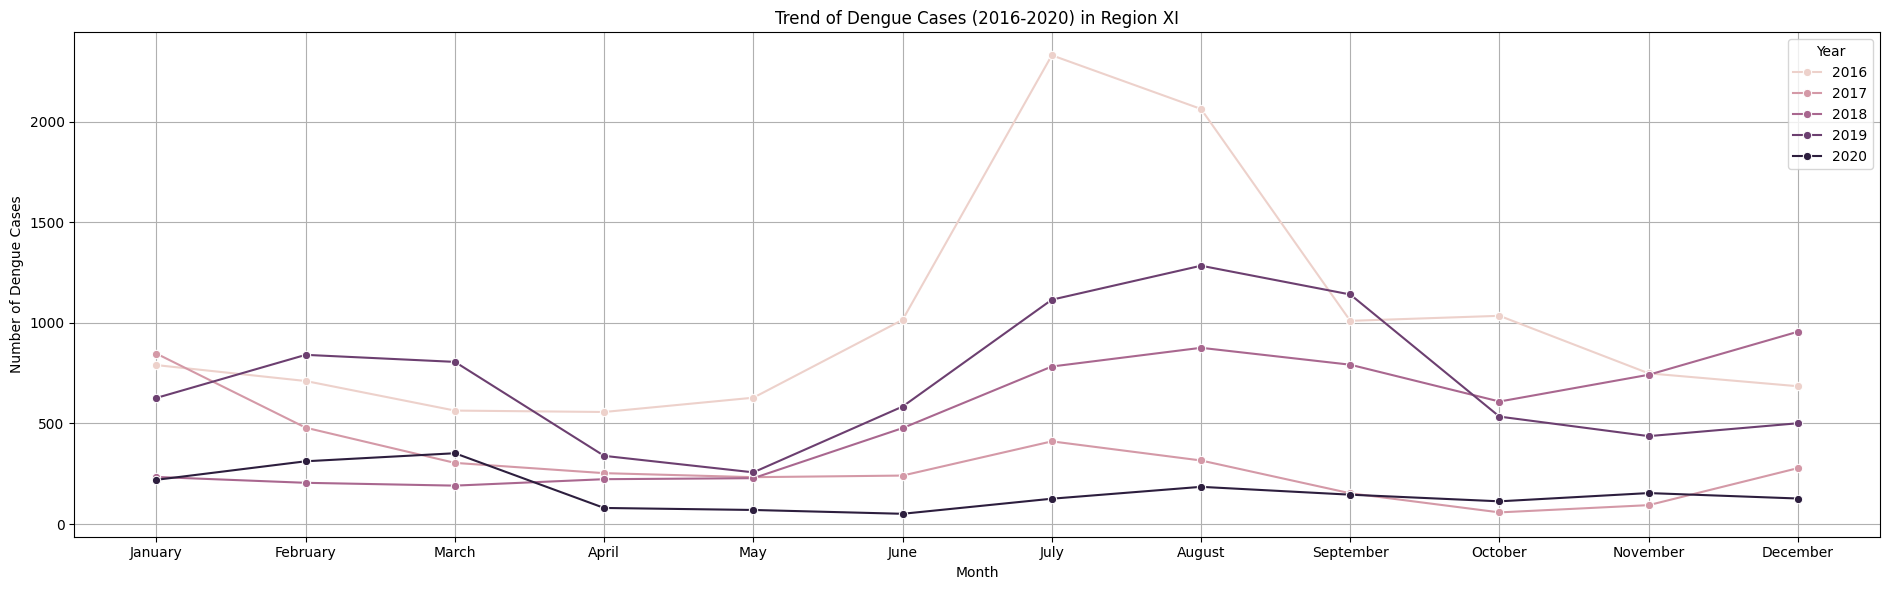

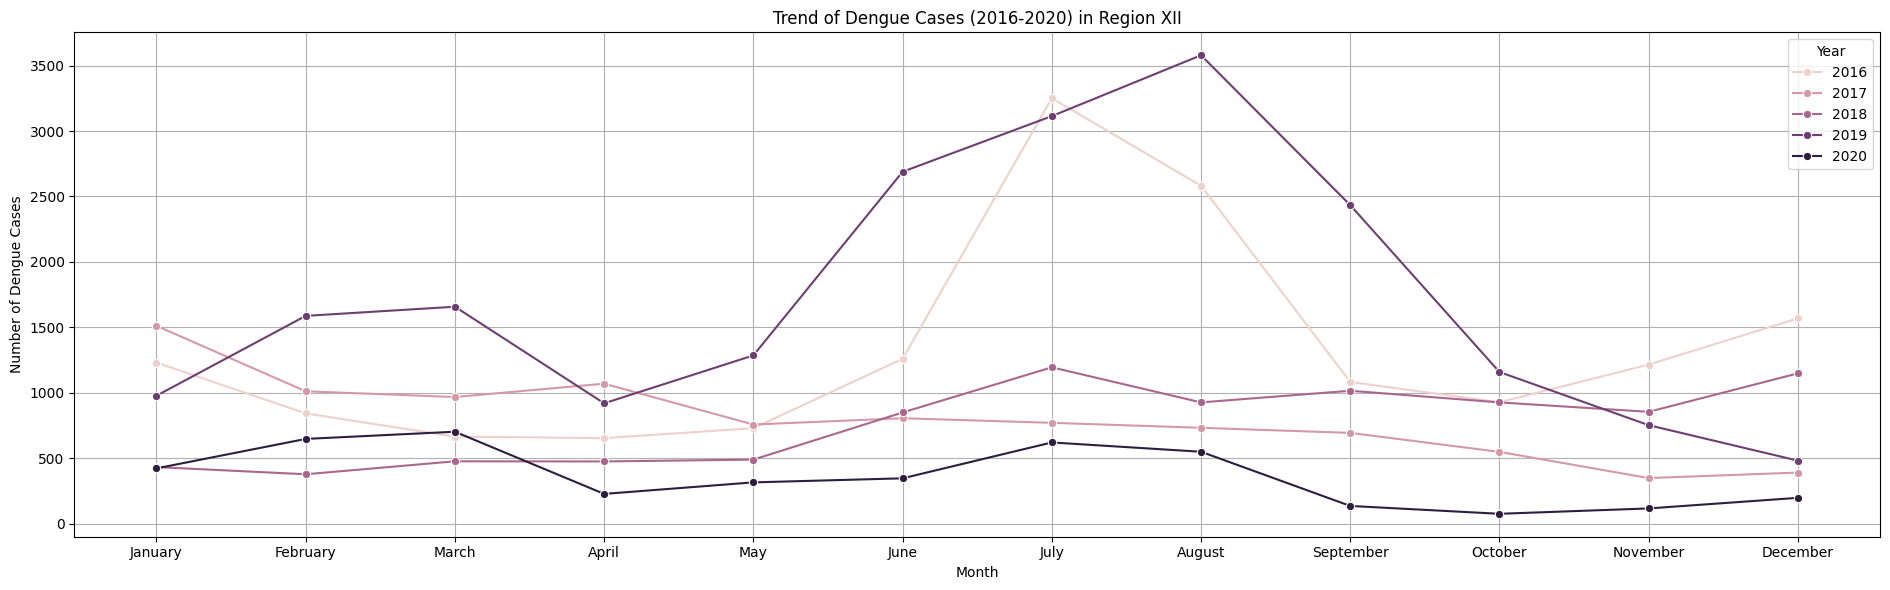

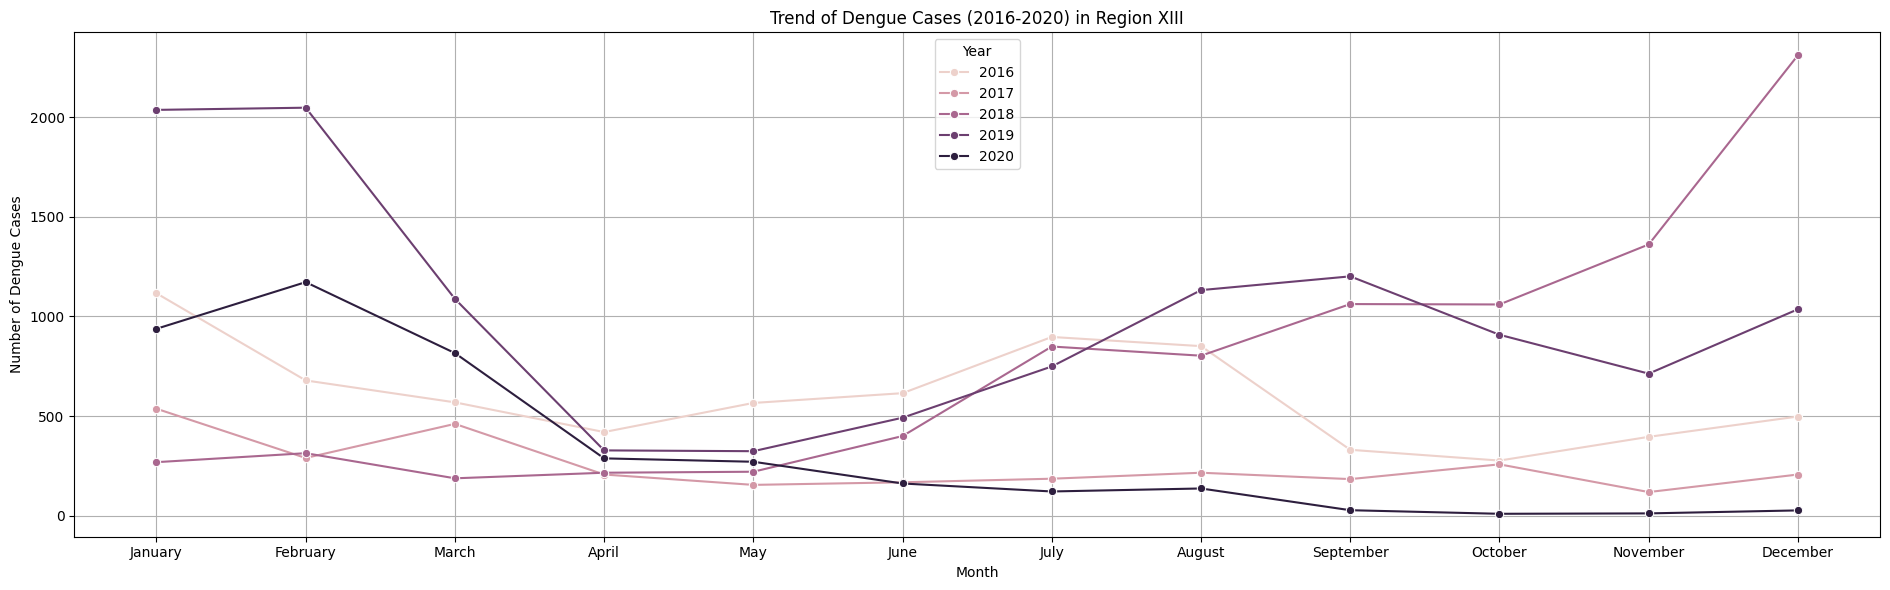

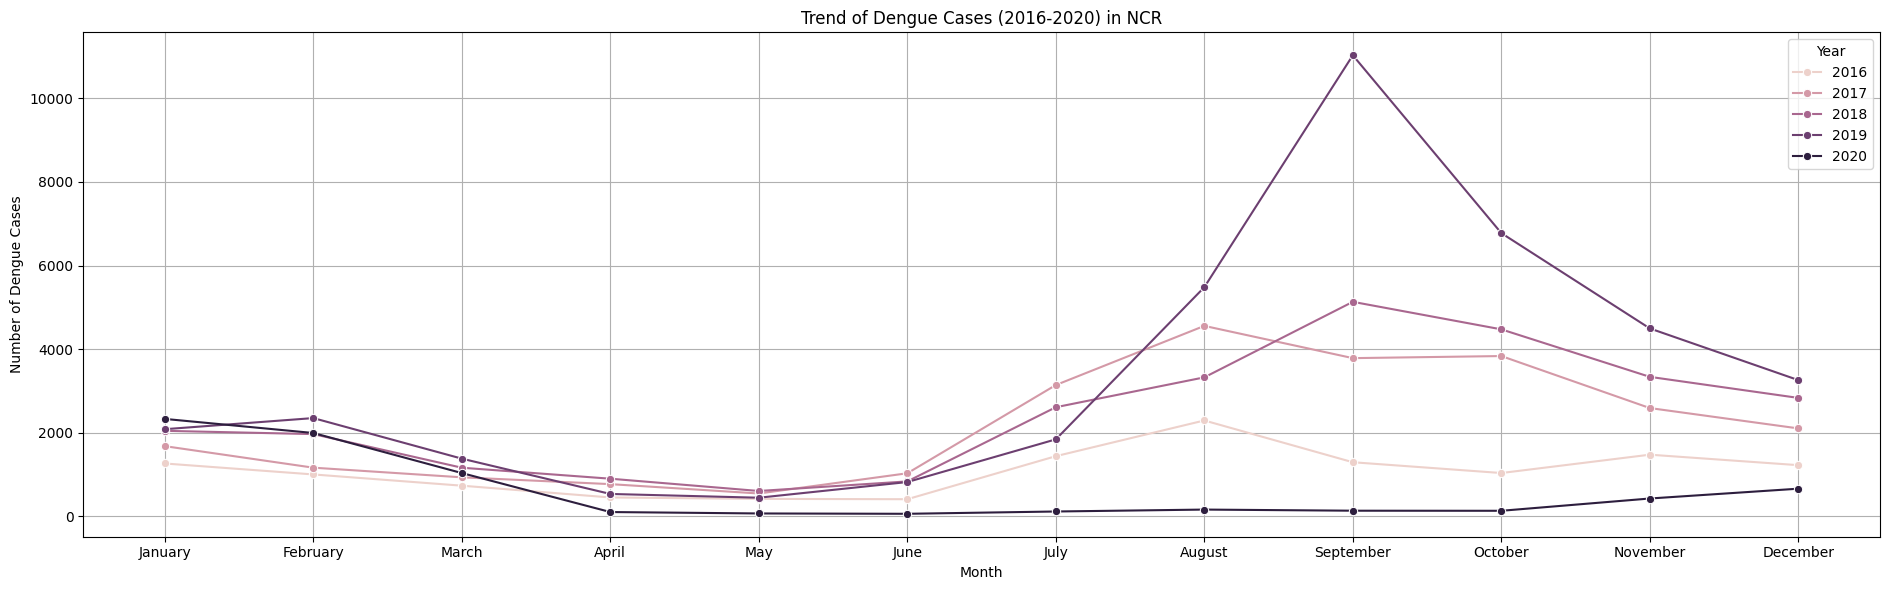

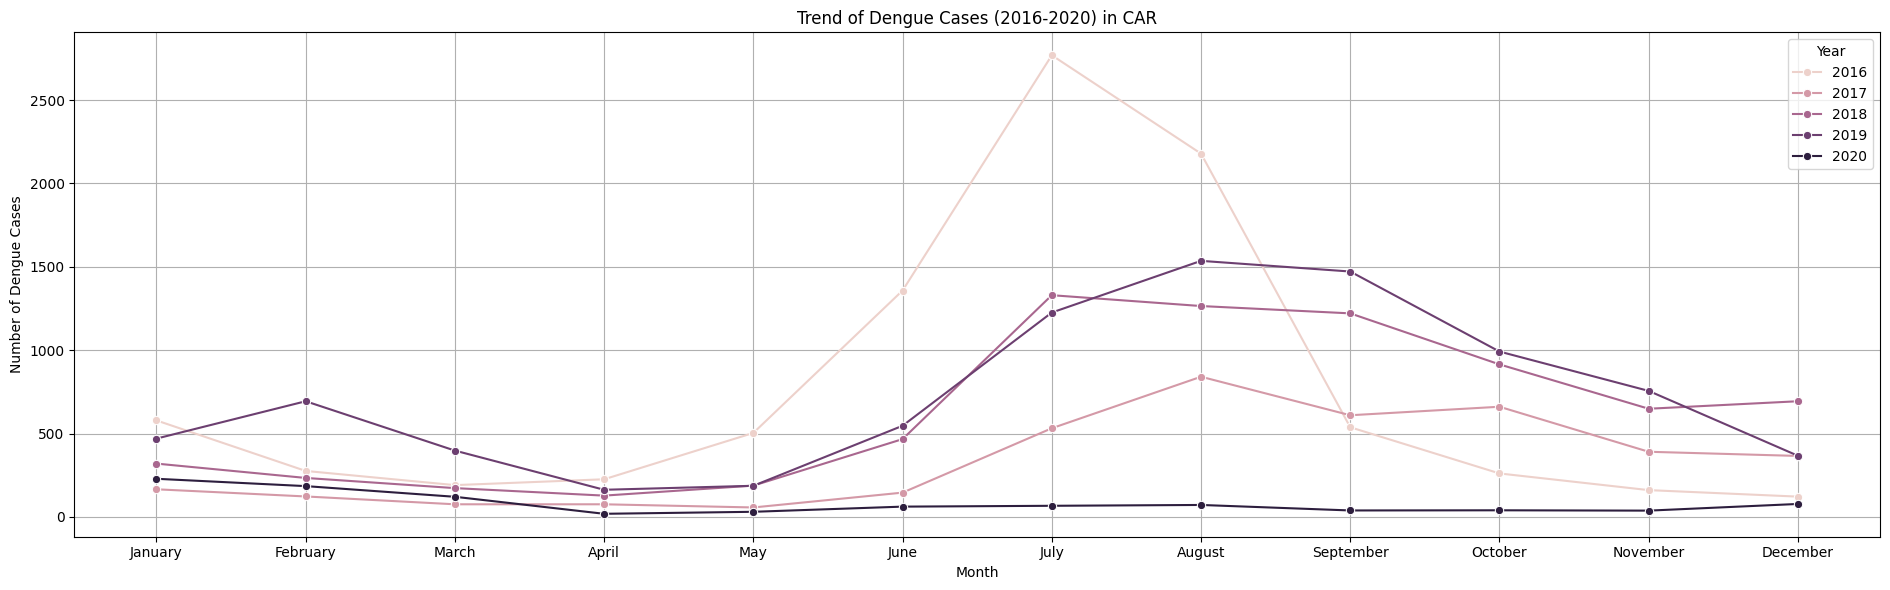

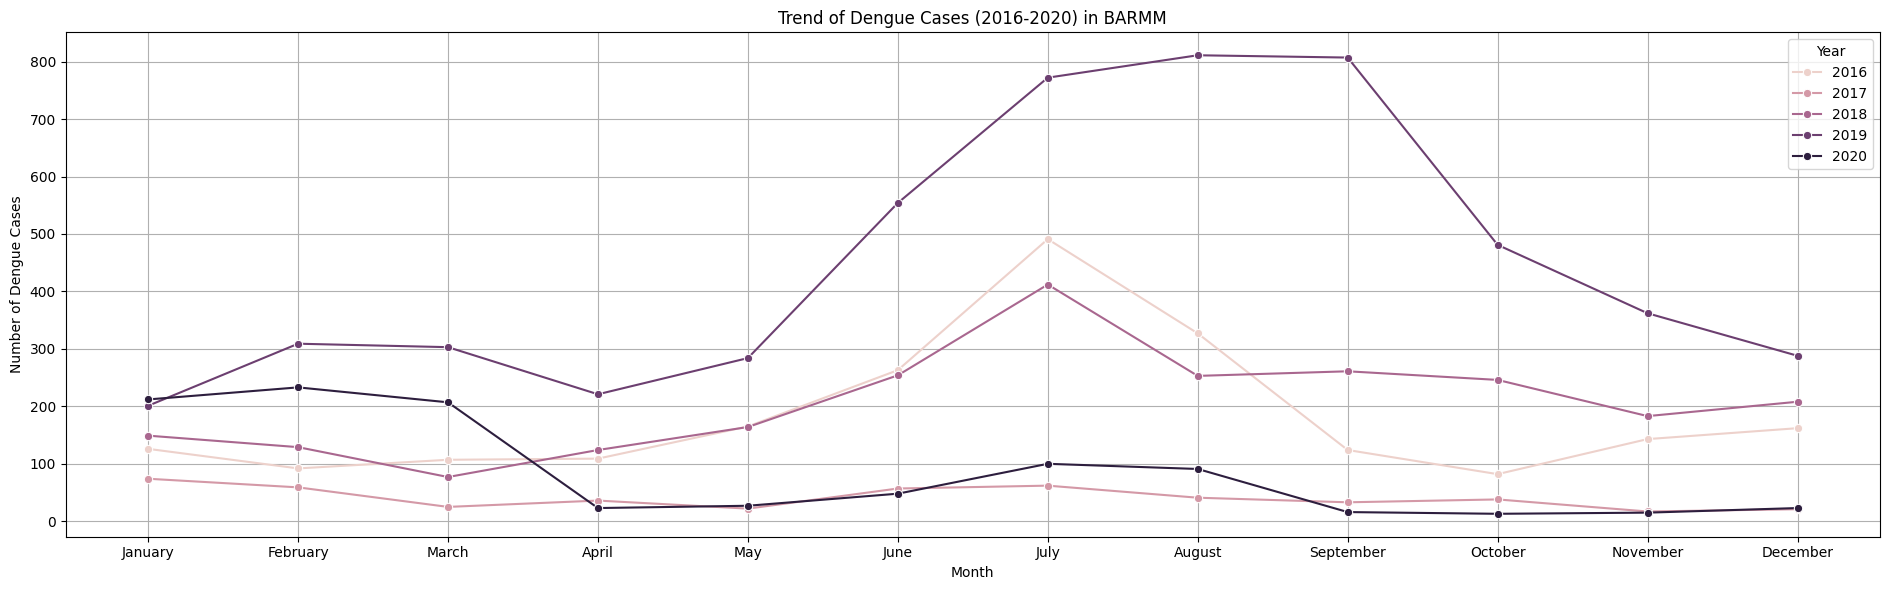

In [21]:
regions = [
    "Region I", "Region II", "Region III", "Region IV-A", "Region IV-B", 
    "Region V", "Region VI", "Region VII", "Region VIII", "Region IX", 
    "Region X", "Region XI", "Region XII", "Region XIII", "NCR", "CAR", "BARMM"
]

for region in regions:
    region_data = dengue[dengue['Region'] == region]
    
    plt.figure(figsize=(19, 6))
    sns.lineplot(data=region_data, x="Month", y="Dengue_Cases", hue="Year", marker='o')
    plt.title(f'Trend of Dengue Cases (2016-2020) in {region}')
    plt.xlabel('Month')
    plt.ylabel('Number of Dengue Cases')
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<h1>Insight No. 14</h1>
<p>Region XIII (Caraga) stands out from other regions with a notably irregular and less pronounced pattern of dengue cases from 2016 to 2020. Unlike most regions that show clear mid-year spikes, Region XIII's cases are more evenly spread out or sporadic, with no strong seasonal trend. This could be due to its lower population density, geographic isolation, or consistent vector control efforts that prevent large outbreaks. The region’s climate and rural landscape may also limit mosquito breeding and virus transmission, making its dengue trends less predictable compared to more urbanized regions.</p>

<h1>Insight No. 15</h1>
<p>Region VII (Central Visayas) shows a distinct pattern compared to other regions, with multiple peaks throughout the year rather than a single mid-year spike. This suggests that dengue transmission in the region is less tied to seasonality and may be influenced by localized factors, such as urbanization, year-round rainfall in some areas, and varied topography. The recurring peaks imply persistent mosquito presence and possibly intermittent outbreaks in different provinces within the region. This highlights the need for continuous, rather than seasonal, vector control efforts in Region VII.

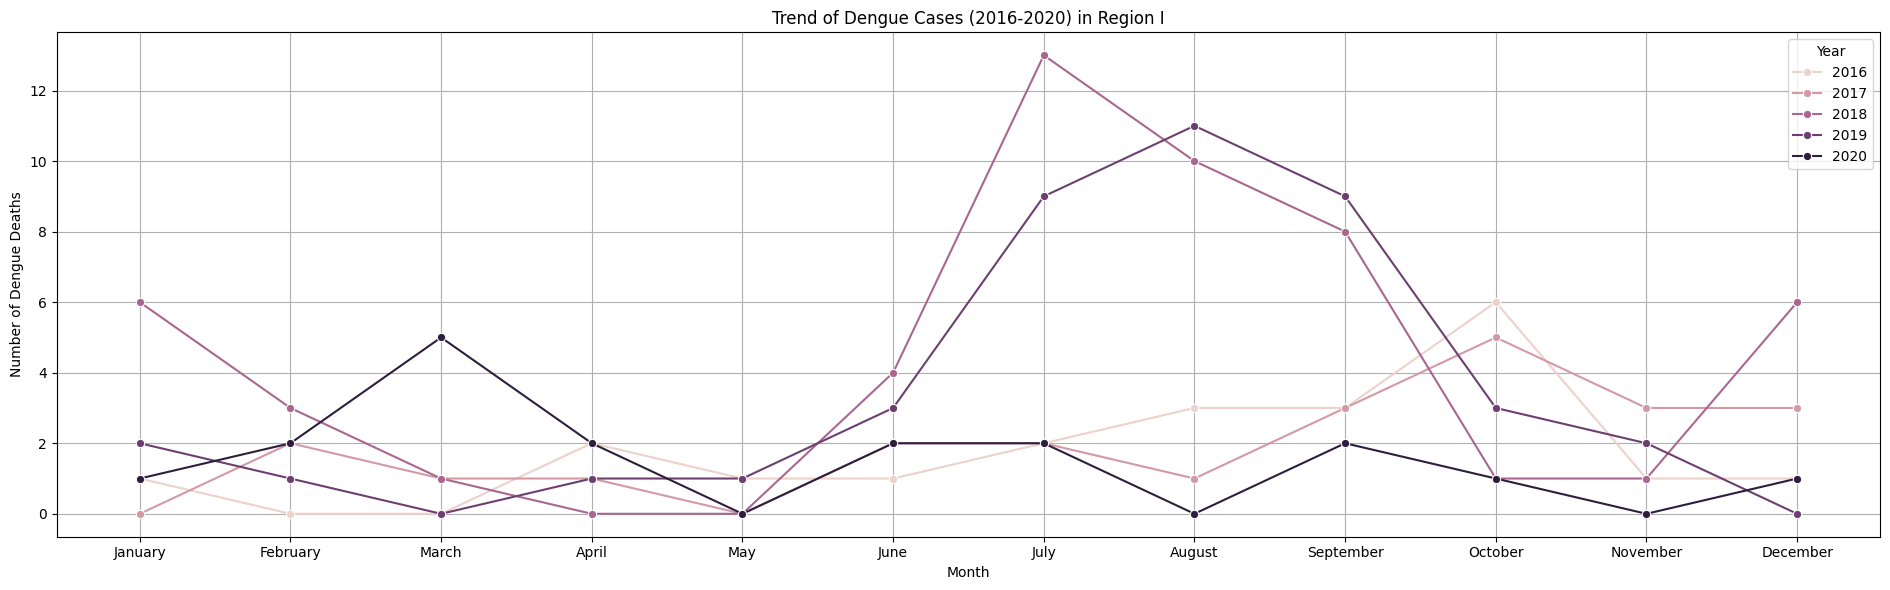

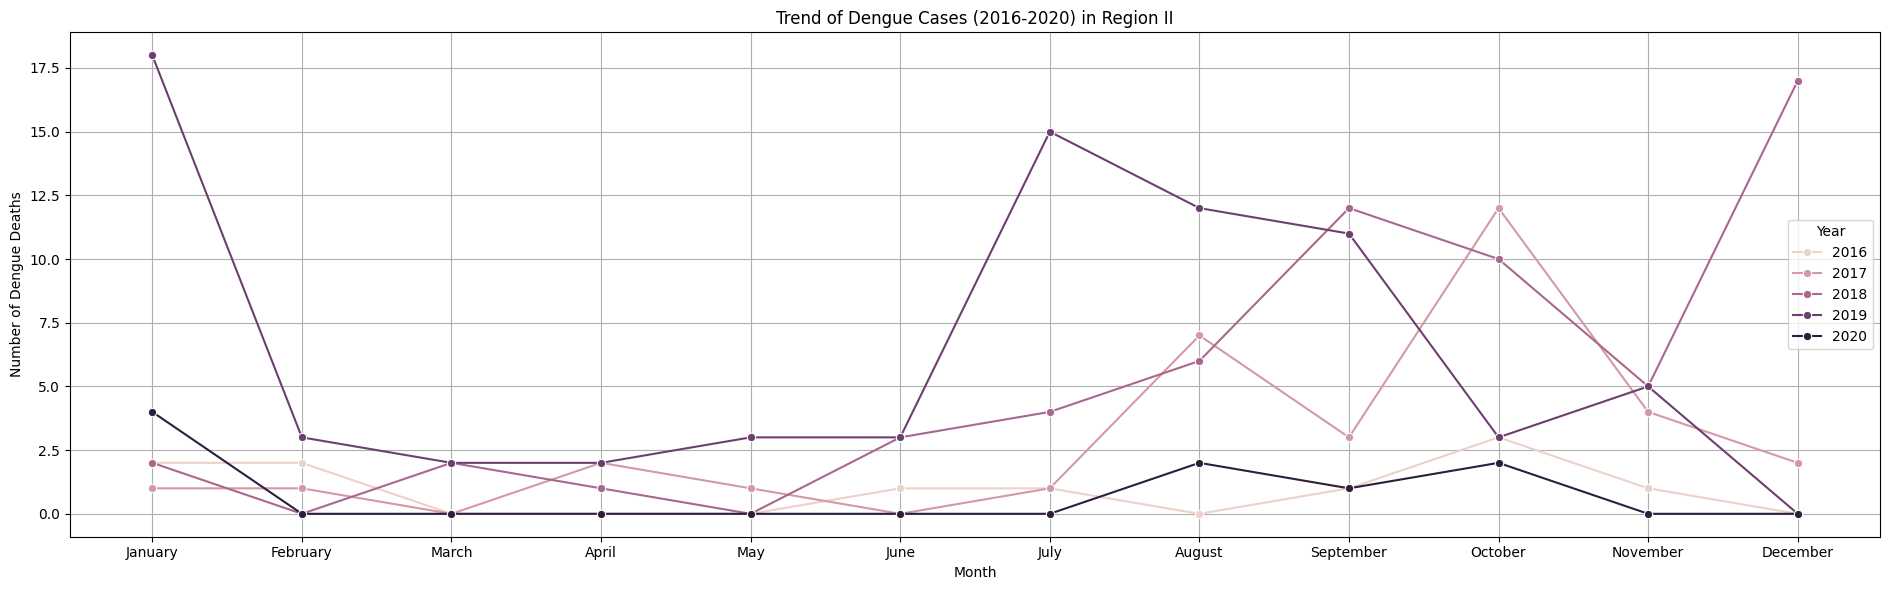

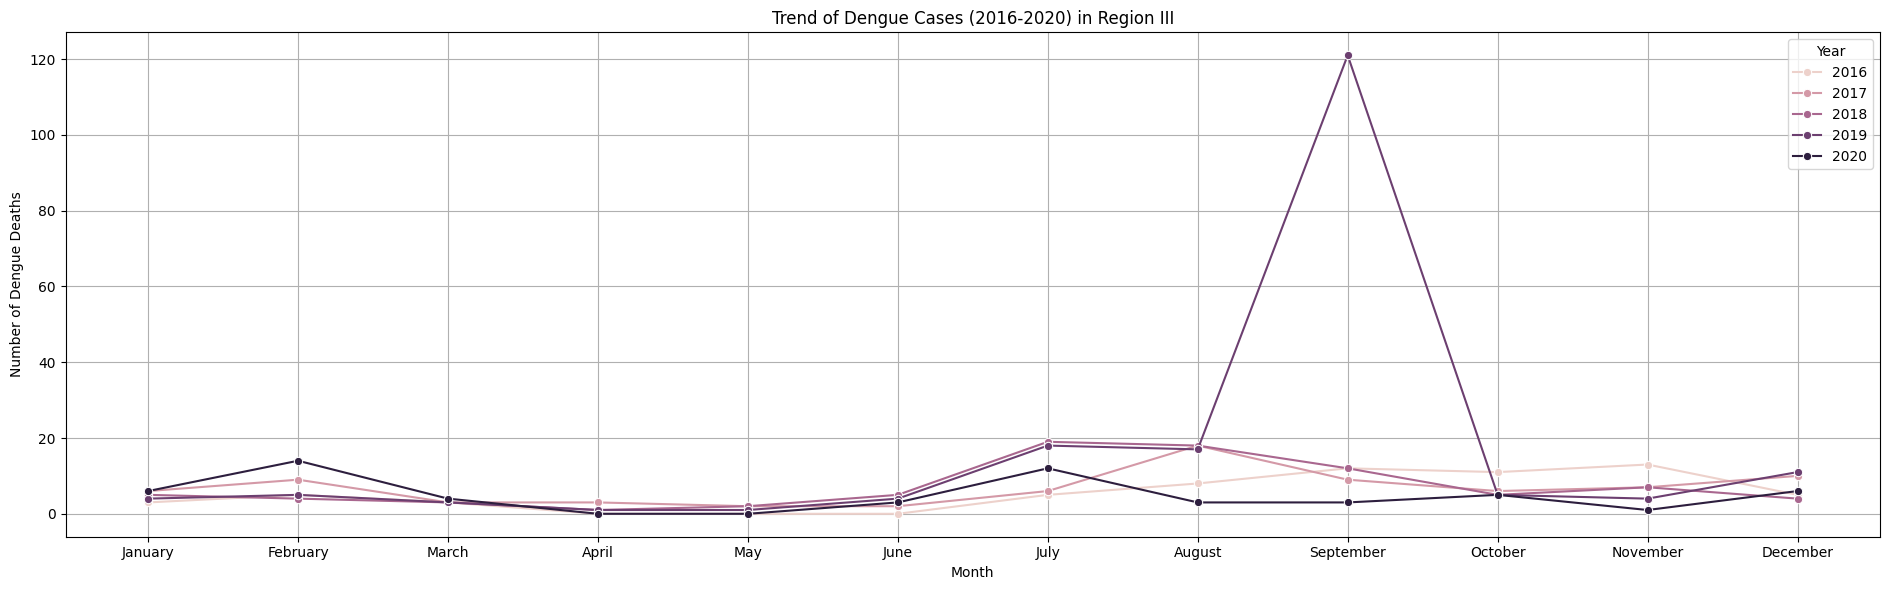

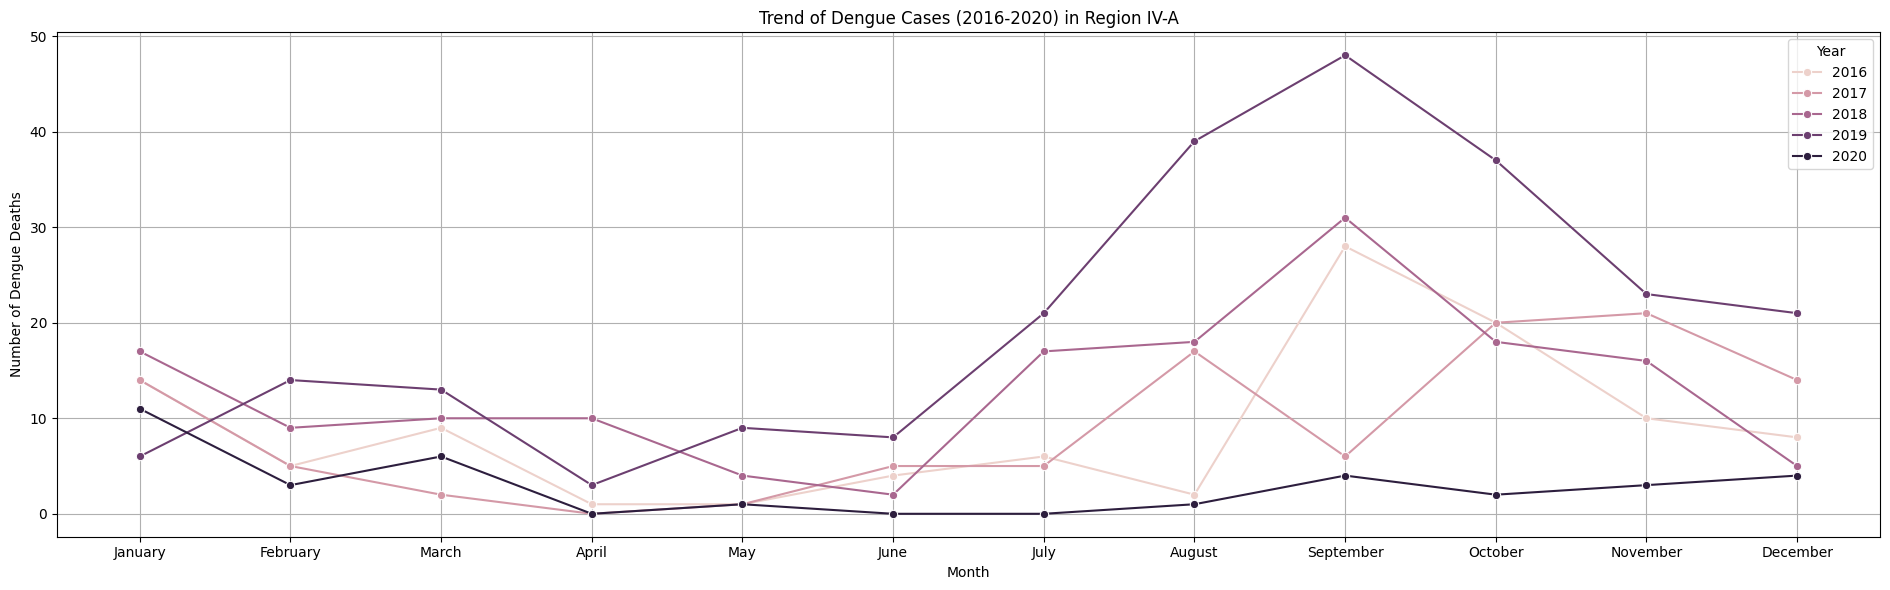

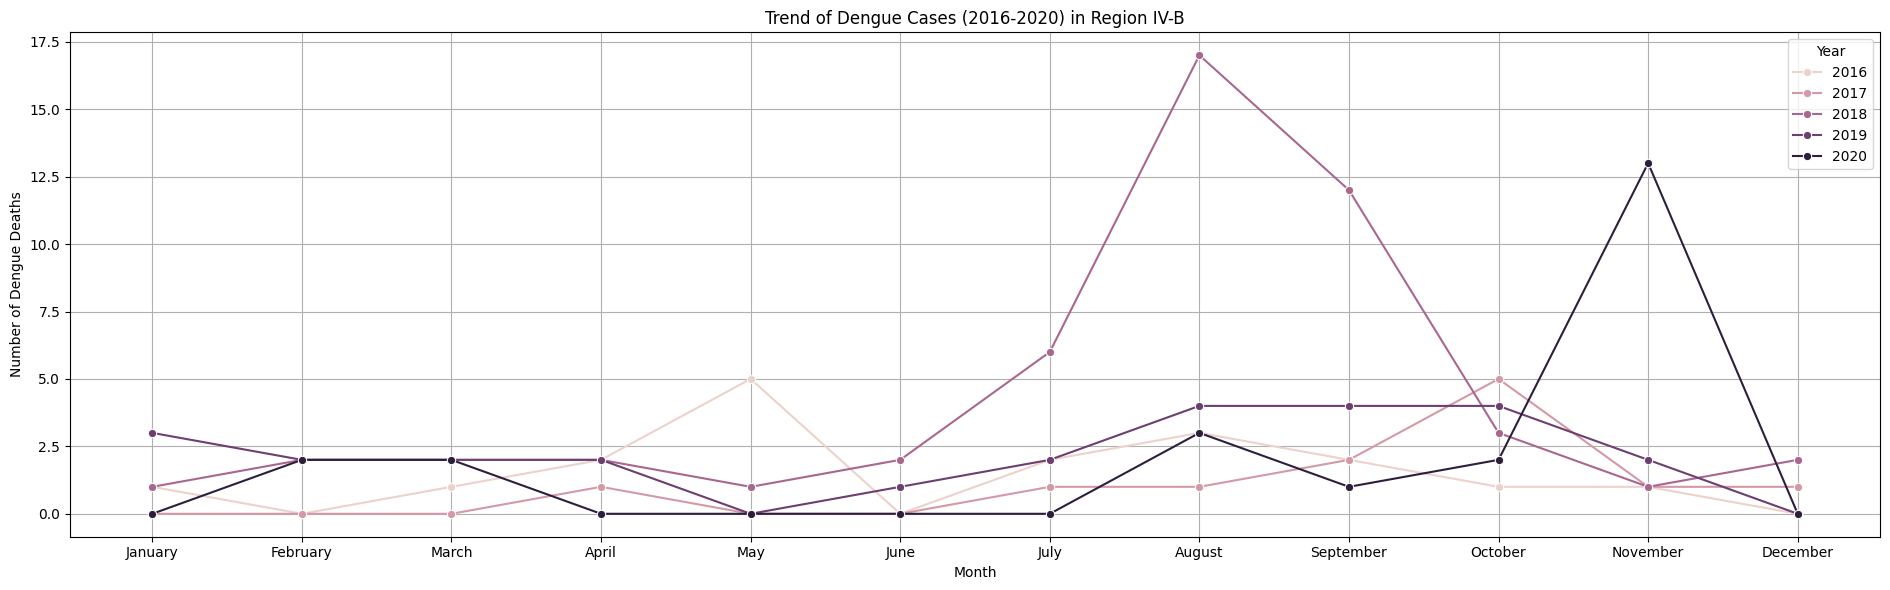

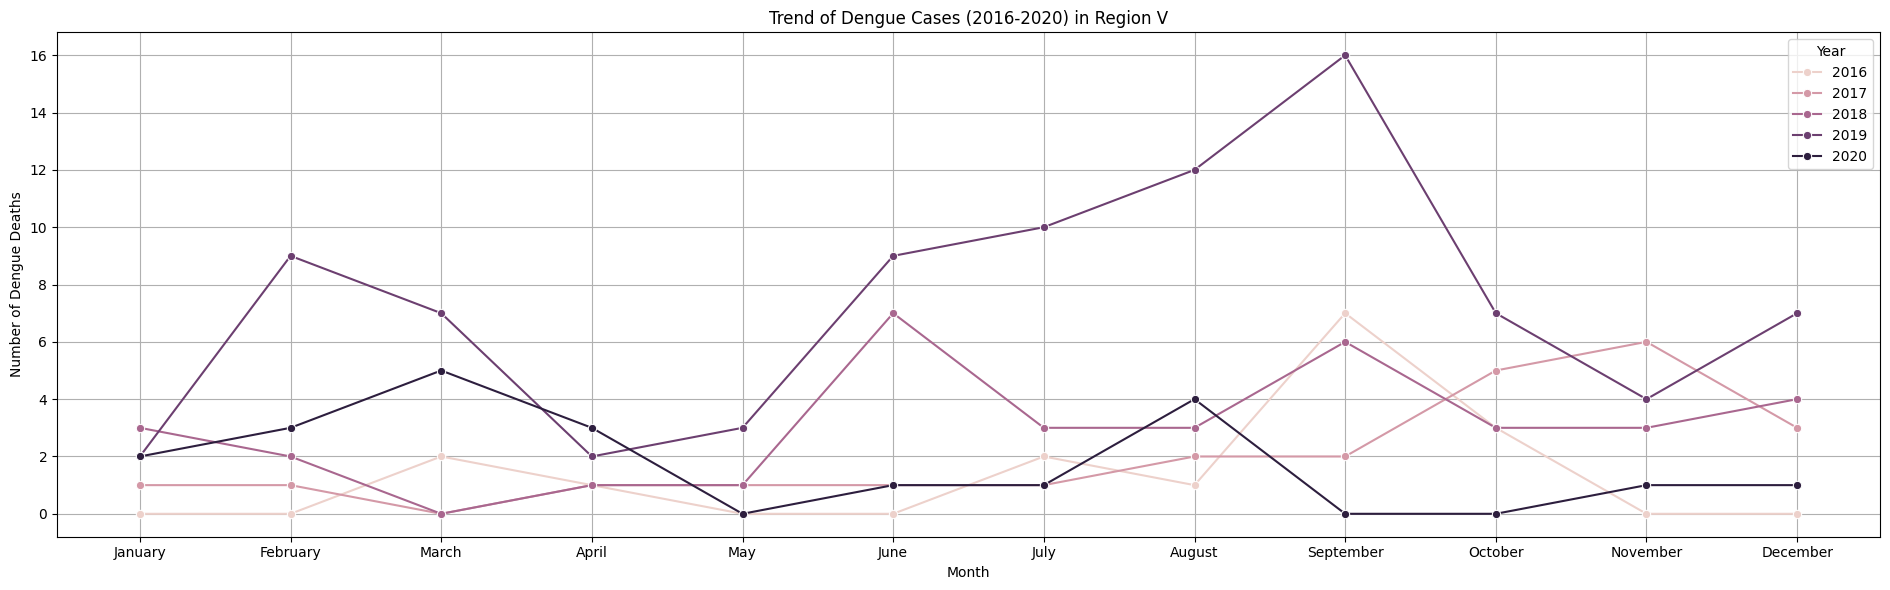

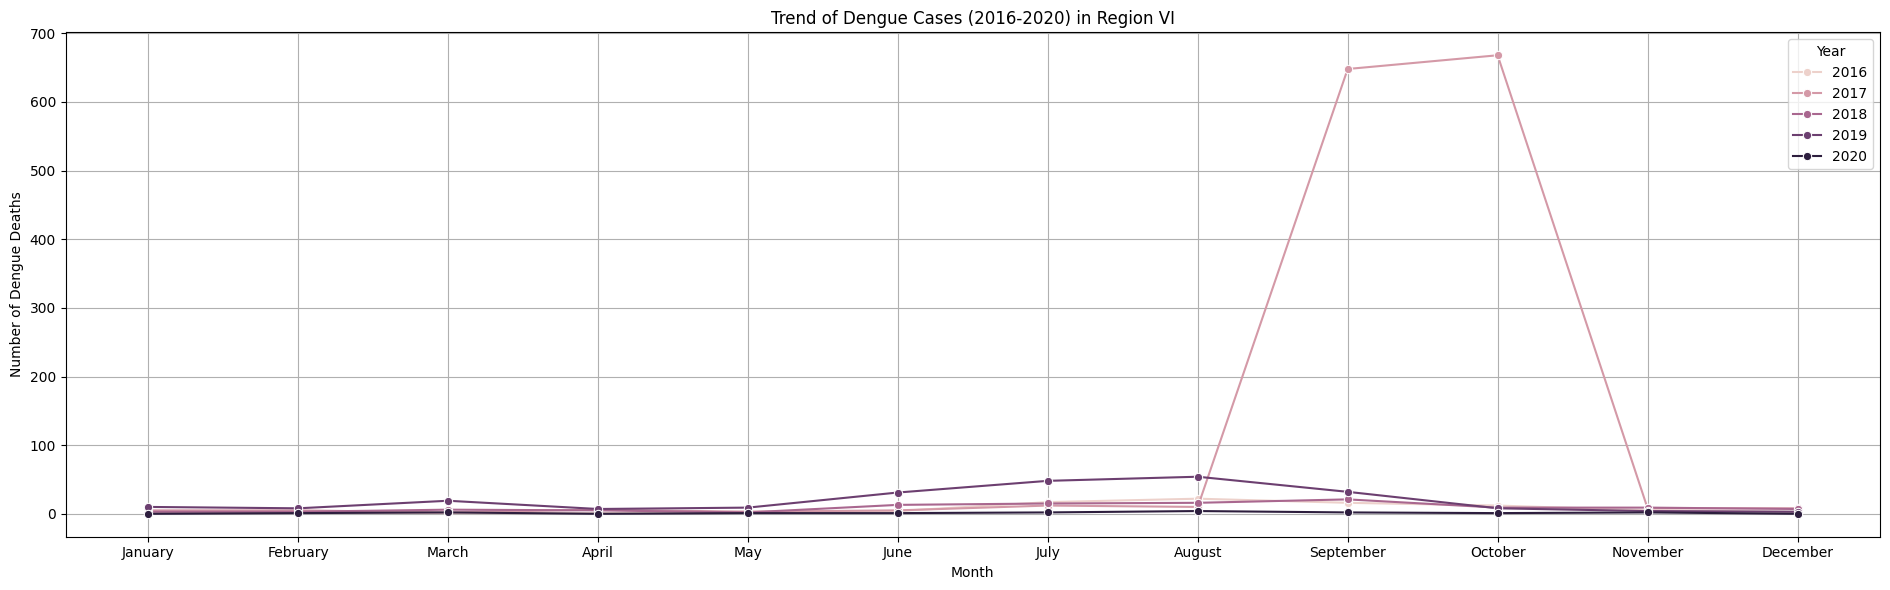

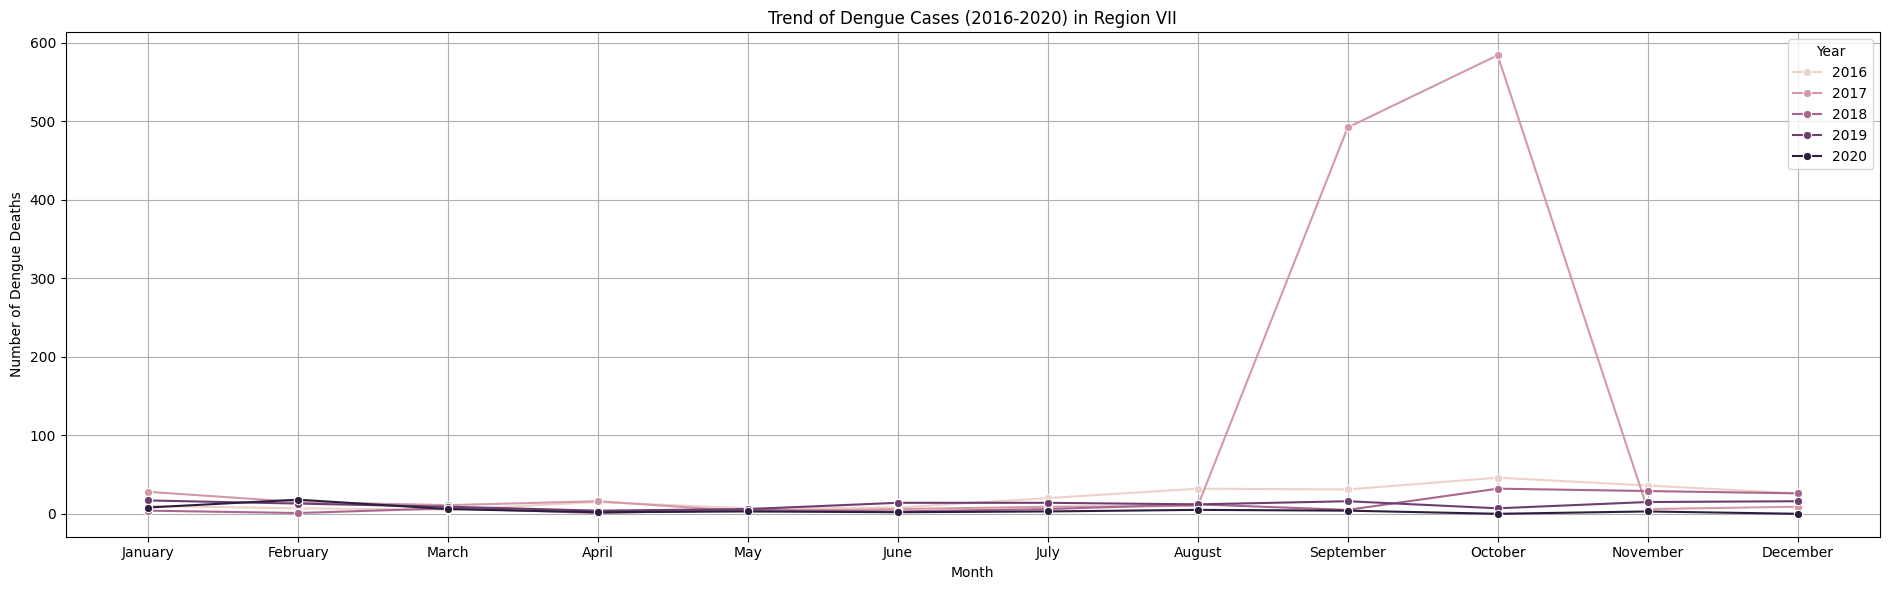

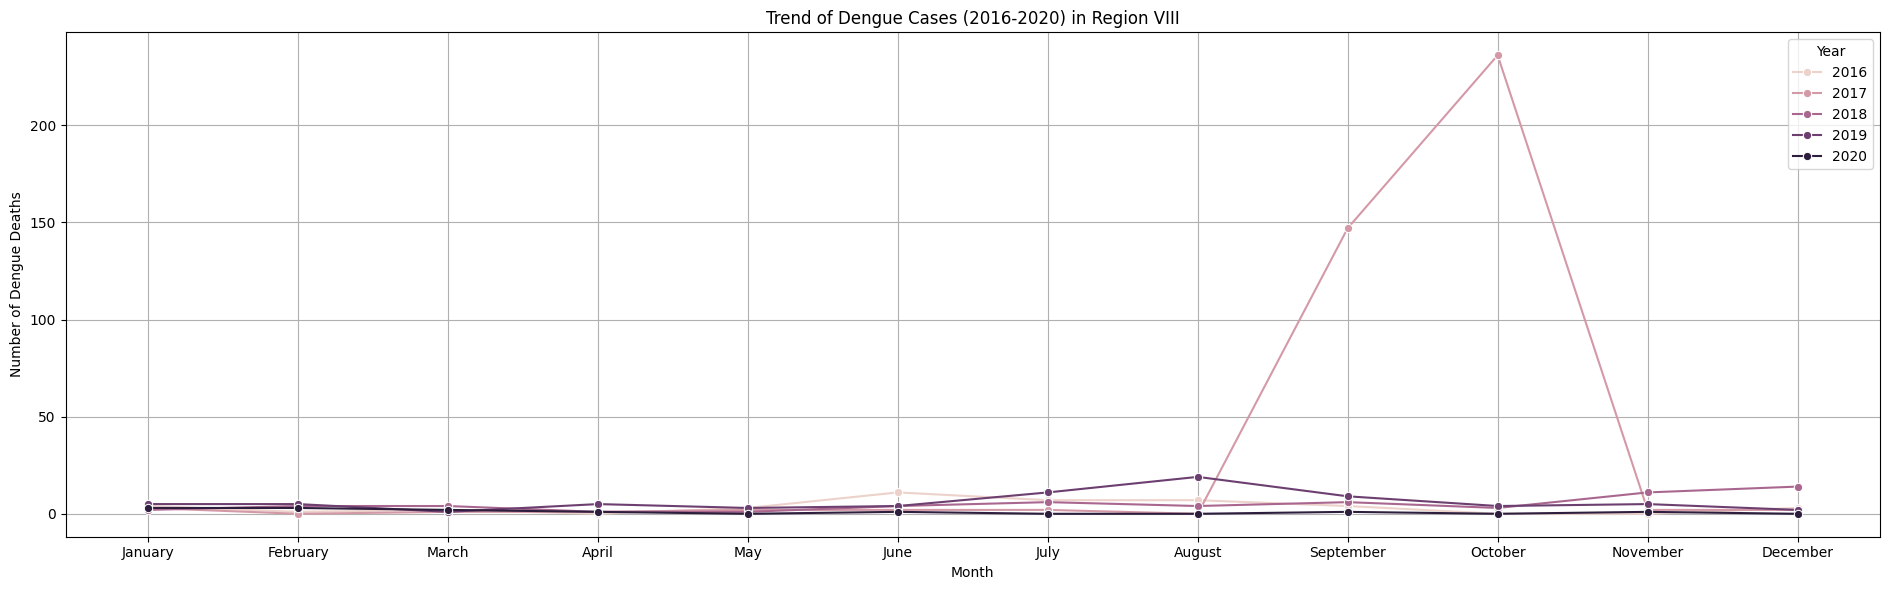

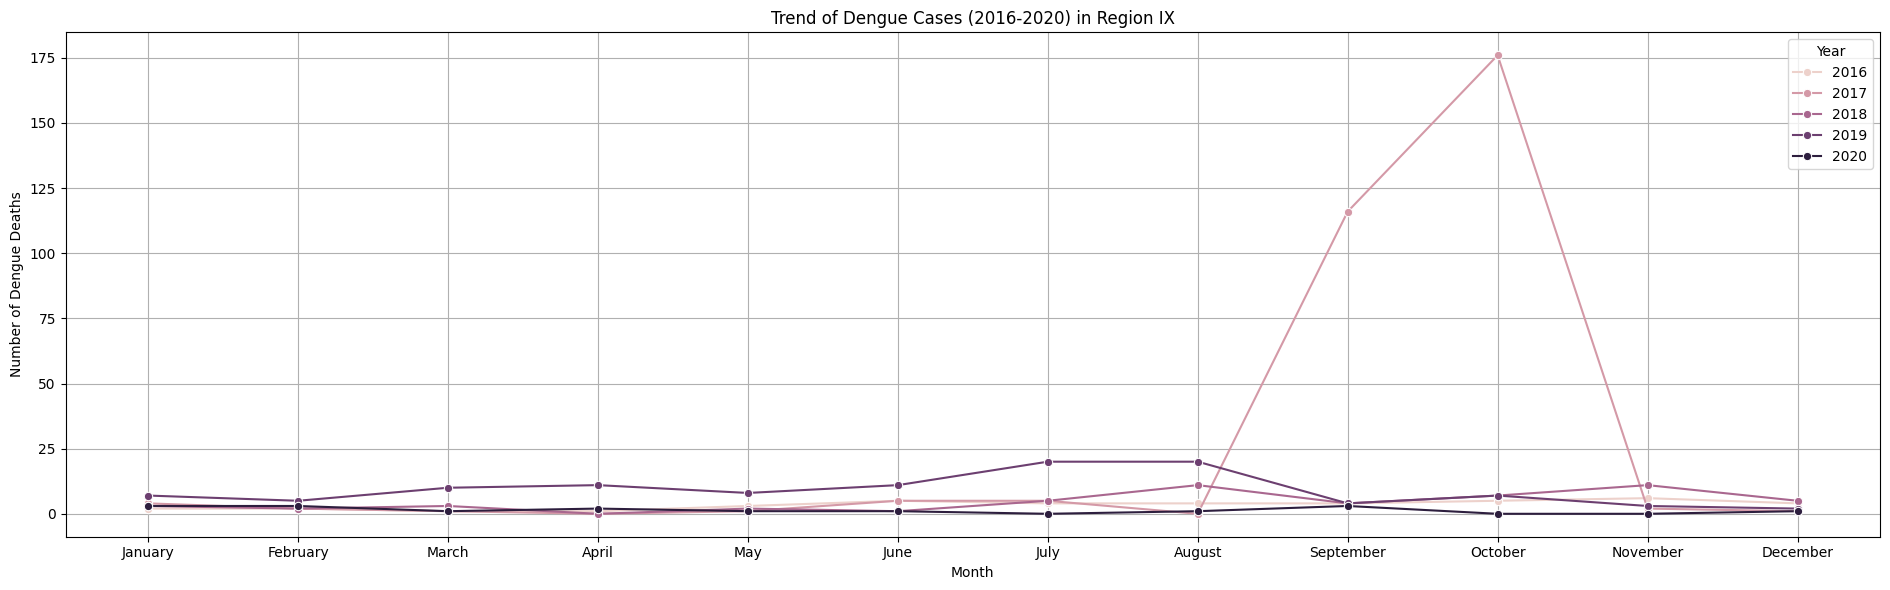

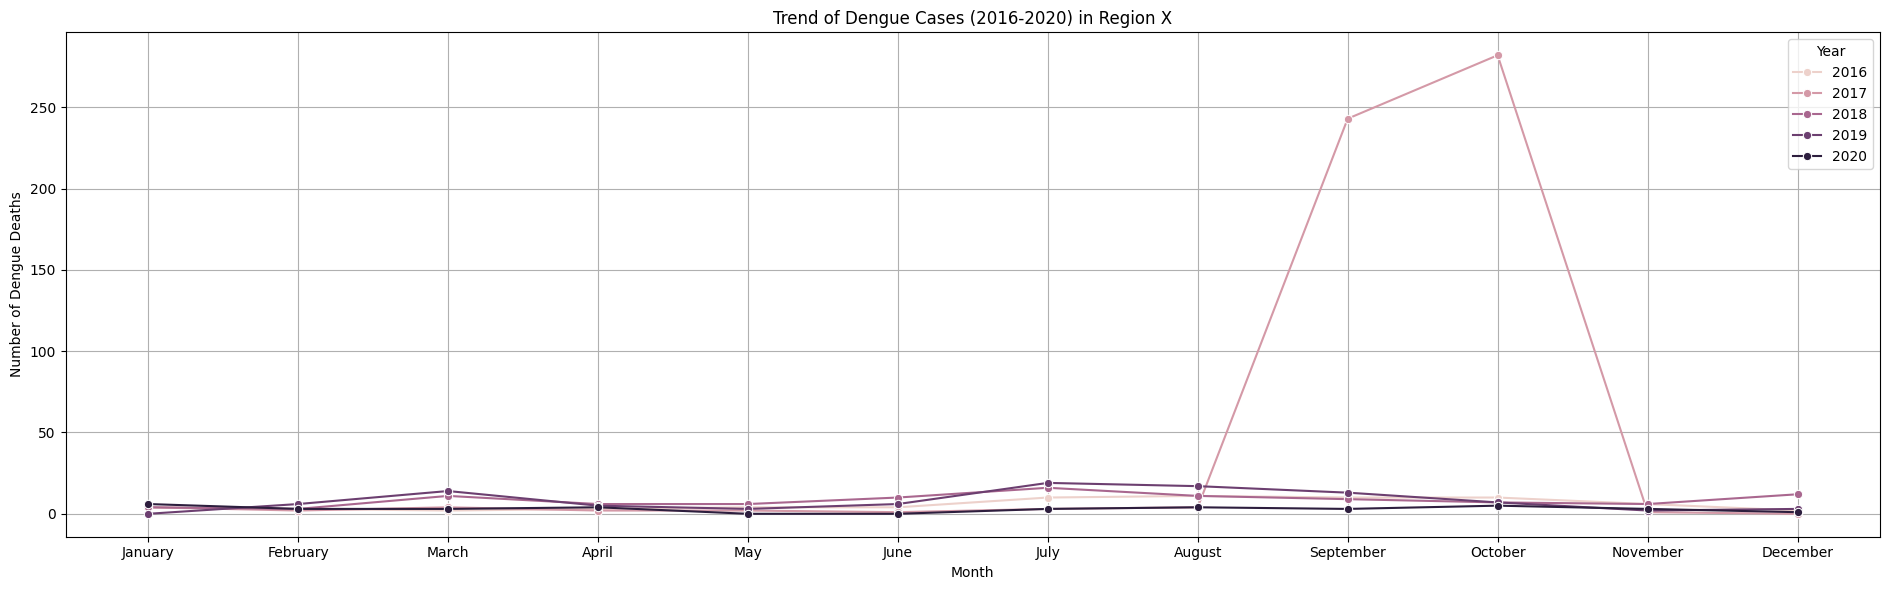

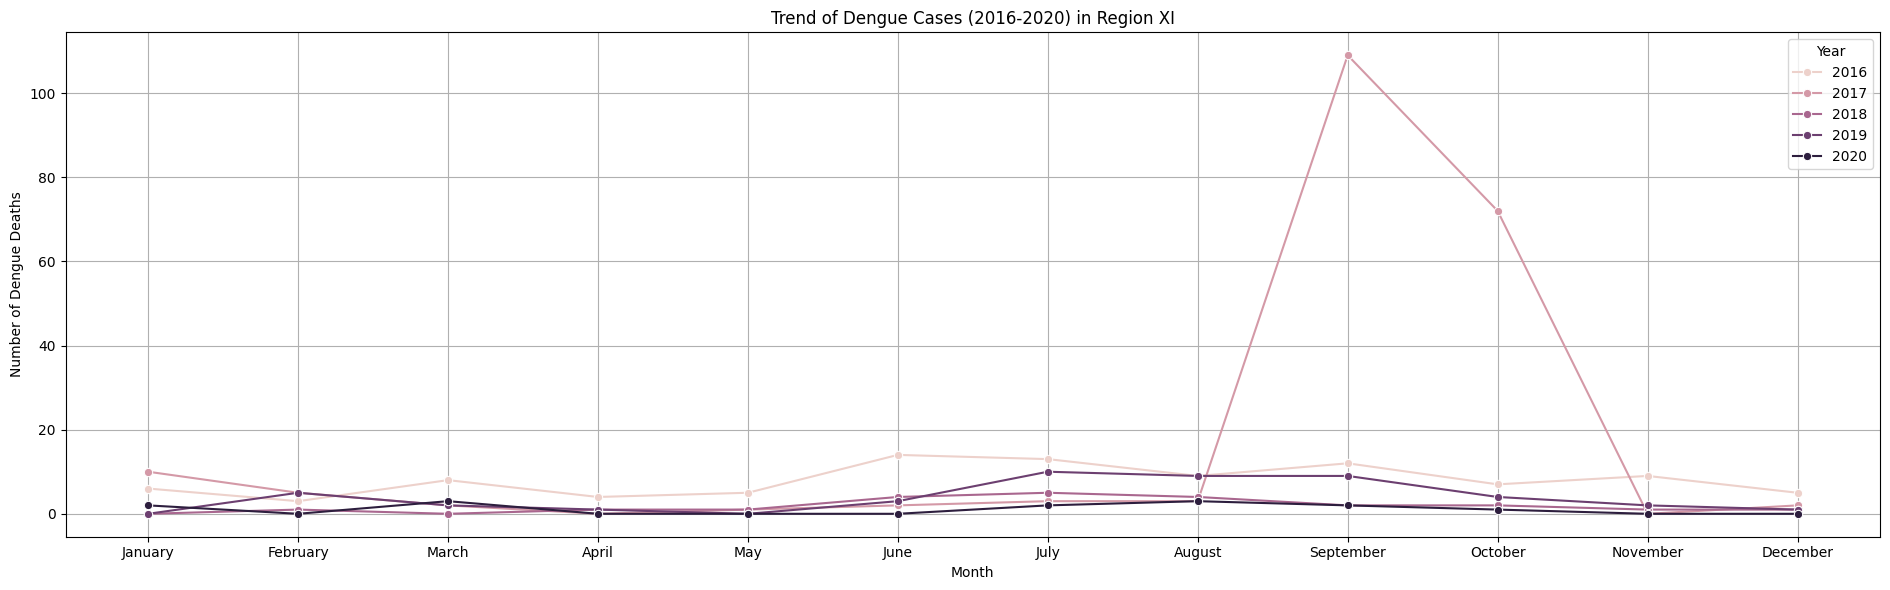

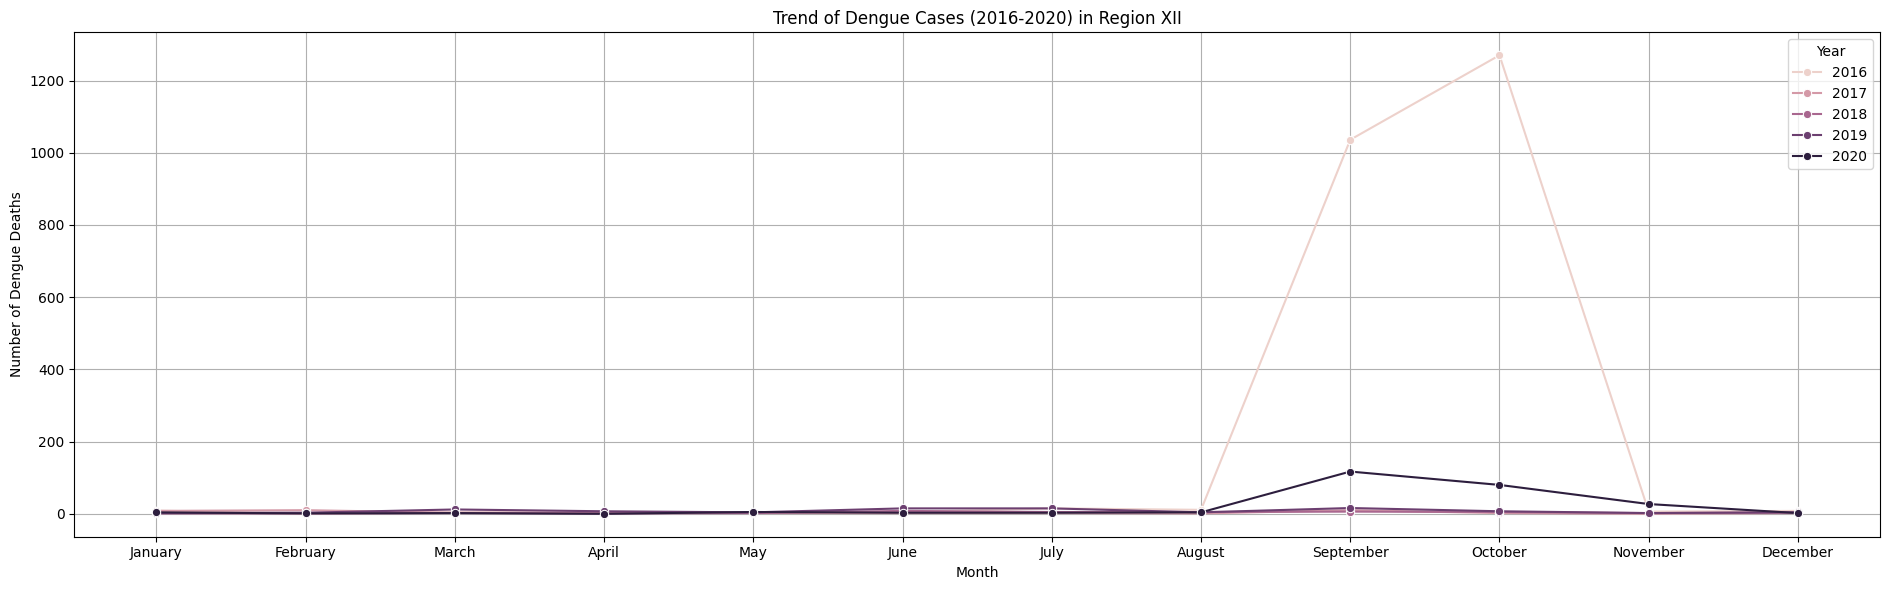

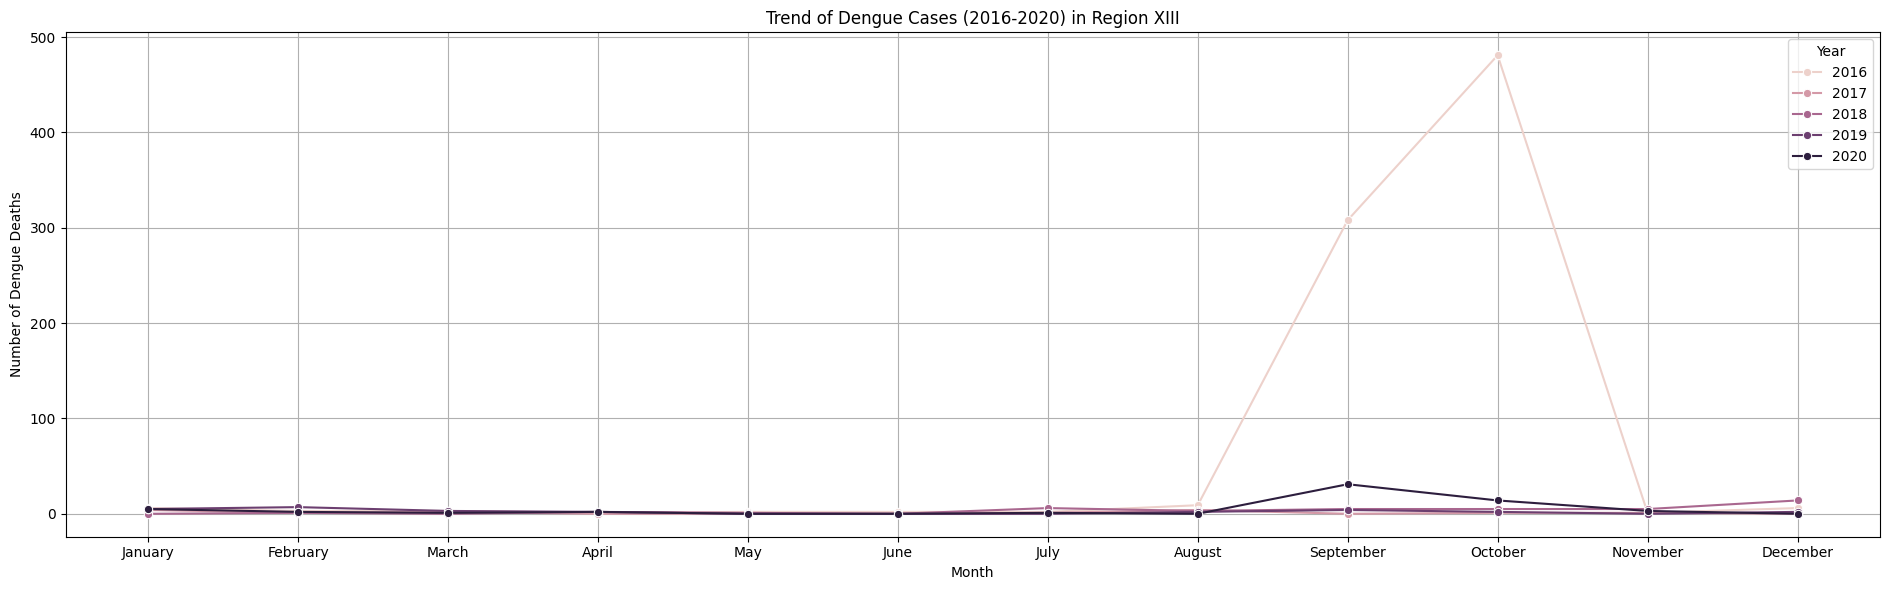

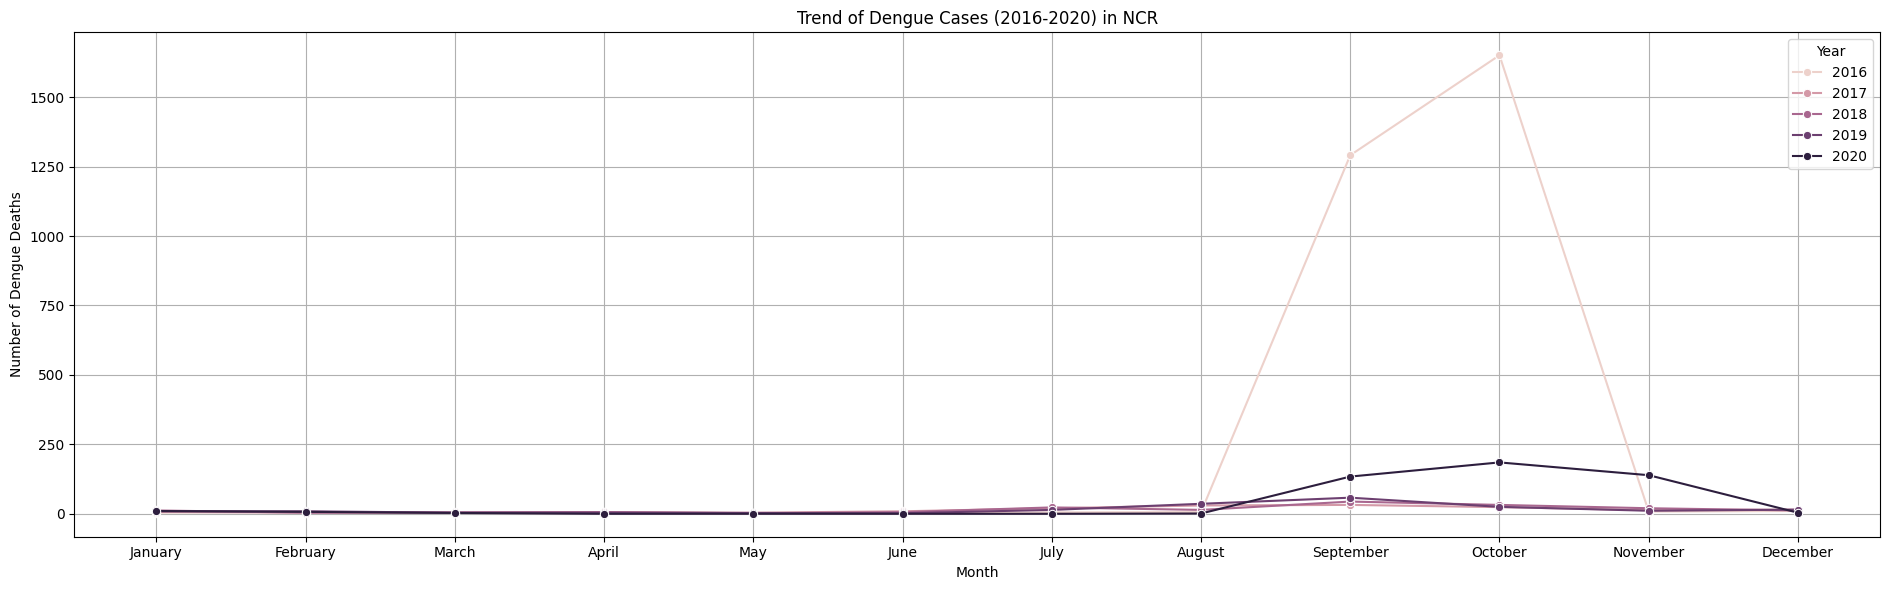

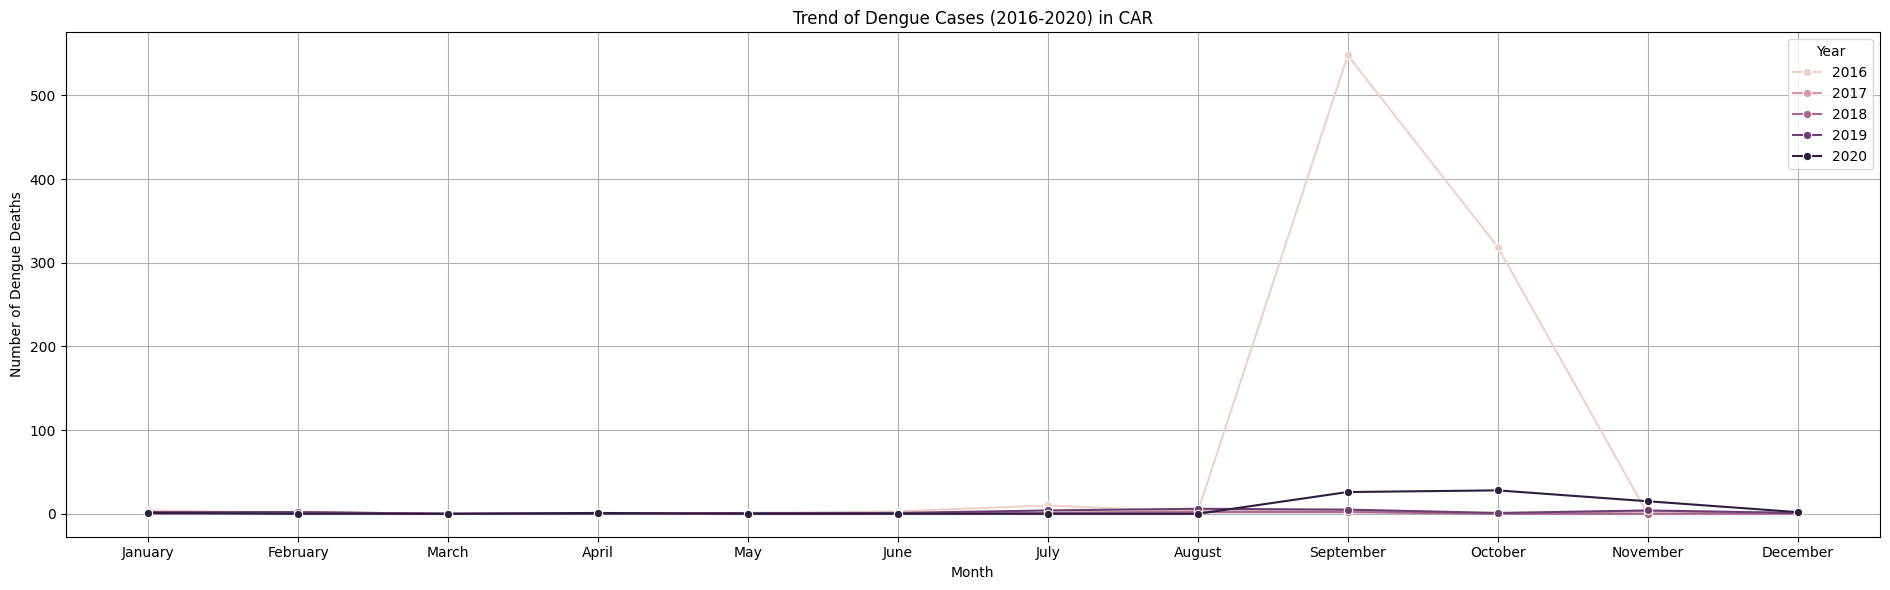

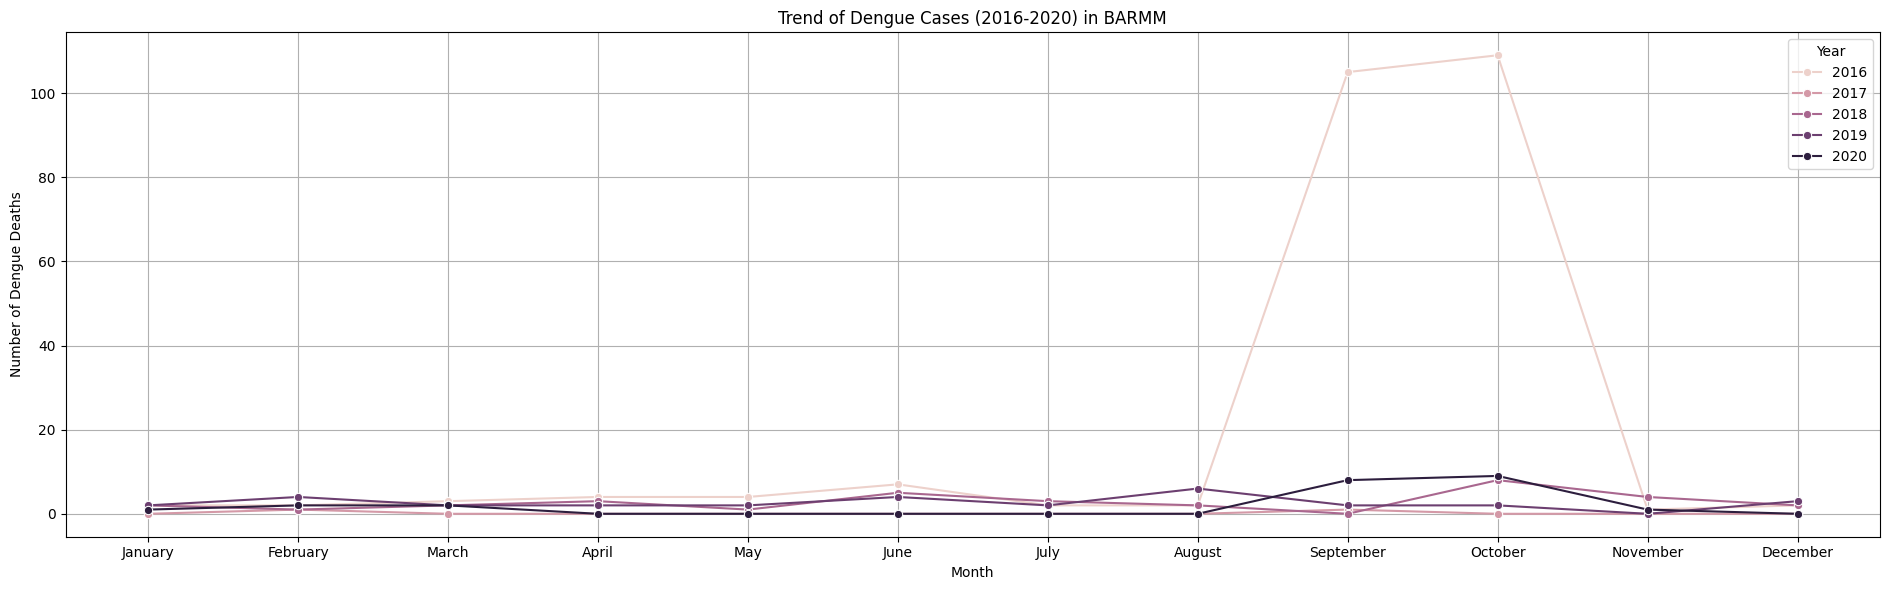

In [22]:
regions = [
    "Region I", "Region II", "Region III", "Region IV-A", "Region IV-B", 
    "Region V", "Region VI", "Region VII", "Region VIII", "Region IX", 
    "Region X", "Region XI", "Region XII", "Region XIII", "NCR", "CAR", "BARMM"
]

for region in regions:
    region_data = dengue[dengue['Region'] == region]
    
    plt.figure(figsize=(19, 6))
    sns.lineplot(data=region_data, x="Month", y="Dengue_Deaths", hue="Year", marker='o')
    plt.title(f'Trend of Dengue Cases (2016-2020) in {region}')
    plt.xlabel('Month')
    plt.ylabel('Number of Dengue Deaths')
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<h1>Insight No. 16</h1>
The trend of dengue deaths across regions from 2016 to 2020 reveals notable differences in severity and timing. Regions like NCR and Region VI experienced sharp spikes in certain years, suggesting major outbreaks or more virulent dengue strains. 

<h1>Insight No. 17</h1>
In contrast, CAR, Region IV-B, and Region XIII consistently reported very low deaths despite having cases, which may point to effective healthcare or possible underreporting. Some regions, like Region IX and XI, show off-season fatalities, indicating that dengue risk isn't limited to rainy months. 

<h1>Insight No. 18</h1>
Meanwhile, BARMM’s irregular death patterns highlight possible challenges in healthcare access or data consistency. These variations stress the importance of tailored, region-specific dengue control and reporting strategies.

<h1> PREDICTIVES </h1>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called df
# Convert Year to numeric if it's currently stored as datetime
# df['Year'] = df['Year'].dt.year

# Check the data types of your features
print(dengue.dtypes)

# Convert Dengue_Cases to numeric if it's not already
# df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])

dengue['Year'] = pd.to_numeric(dengue['Year'])
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'])
# Split the data into features (X) and target variable (y)
X = dengue['Year'].values.reshape(-1, 1)
y = dengue['Dengue_Cases'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make a prediction for a new year
new_year = 2025
new_cases = model.predict([[new_year]])
print("Predicted number of dengue cases in", new_year, ":", new_cases[0])


ModuleNotFoundError: No module named 'sklearn'

In [25]:

plt.scatter(X_train, y_train, color='blue', label='Training Data')


plt.scatter(X_test, y_test, color='red', label='Test Data')


plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')


plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Linear Regression of Dengue Cases Over Time')
plt.legend()

# Show plot
plt.gcf().set_size_inches(20,11)
plt.show()


NameError: name 'X_train' is not defined

In [ ]:
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')

In [ ]:
dengue_NCR = dengue.groupby([{dengue[dengue["Region"]=="NCR"],["Dengue_Deaths"]}]).sum()

In [ ]:
dengue_NCR = dengue[dengue["Region"]=="NCR"].groupby("Region")["Dengue_Cases"].sum()

In [ ]:
dengue_NCR

In [ ]:
dengue["Region"]=="NCR"

In [ ]:
dengue

In [ ]:
dengue_NCR_2016 = dengue[(dengue["Region"]=="NCR") & (dengue["Year"]=="2016")]["Dengue_Cases"].sum()

In [ ]:
dengue_NCR_2016

In [ ]:
dengue["Year"] == "2016"